# Plane wave analysis

Now, the Helmholtz theorem states that any vetor file can be decomposed into the sum of an irrotational and a solenoidal vector field.

So the displacement of solid and fluid could be defined as the below equations:
$$ \boldsymbol{u} = \boldsymbol{u}_\text{p} + \boldsymbol{u}_\text{s} = \text{grad} \ \phi _\text{s} + \text{curl}\ \boldsymbol{\psi}_\text{s}  $$

$$ \boldsymbol{w} = \boldsymbol{w}_\text{p} + \boldsymbol{w}_\text{s} = \text{grad} \ \phi _\text{f} + \text{curl}\ \boldsymbol{\psi}_\text{f}  $$

where $\phi$  is a scalar field called "scalar potential", and $\psi$ is a vector field, called a vector potential.

we should note that $\boldsymbol{u}_\text{p}$, $\boldsymbol{w}_\text{p}$ are the gradient of the scalar field, and $\boldsymbol{u}_\text{s}$, $\boldsymbol{w}_\text{s}$ are the curl of the vector field. Thus we could obtain

$$  \text{curl} \ \boldsymbol{u}_\text{p} = \boldsymbol{0}\ \  \text{and} \ \ \text{curl} \ \boldsymbol{u}_\text{p} = \boldsymbol{0} $$

$$  \text{div} \ \boldsymbol{u}_\text{s} = 0 \ \  \text{and} \ \ \text{div} \ \boldsymbol{u}_\text{s} = 0 $$

The controling equations of model are presented as below:

$$ \alpha \frac{\partial{\epsilon _\text{v}}}{\partial t} + S\frac{\partial p}{\partial t} = -\text{div} [\phi (\vec{\dot{w}} - \vec{\dot{u}})] \  \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  (1) $$

$$ \text{div} \ (\boldsymbol{\sigma} - \alpha p \mathbf{I}) = (1-\phi) \rho_\text{s} \vec{\ddot{u}} + \phi \rho_\text{f} \vec{\ddot{w}} \  \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  (2)$$

$$\tau \phi \rho_\text{f} \vec{\ddot{w}} -(\tau - 1) \phi \rho_\text{f} \vec{\ddot{u}} = -\phi \text{grad} \ p - \frac{\phi ^2 \eta}{\hat{k}}(\vec{\dot{w}} - \vec{\dot{u}}) \  \  \ \ \ \ \ \  (3) $$

where, the $\Upsilon$ is the viscodynamic opeartor.

Based on the equation (1), the pressure could be dervied as bellow:
$$ p = -\phi\text{M} \ \text{div} \ \vec{w} - (\alpha - \phi) \text{M}\ \text{div} \ \vec{u}  \ \ \ \ \ \ \ \ \ \ \ (4)$$

where $\text{M} = \frac{1}{S}$.

Substituting the expression (4) into equations (2) and (3), we obtain

$$ (1-\phi) \rho_\text{s} \vec{\ddot{u}} + \phi \rho_\text{f} \vec{\ddot{w}} = (\lambda + \mu + \alpha^2\text{M} - \alpha \phi \text{M}) \text{grad}\ \text{div} \ \vec{u} + \mu \ \text{div} \ \text{grad}\ \vec{u} + \alpha \phi \text{M}\ \text{grad}\ \text{div} \ \vec{w} \ \ \ \ \ \ \ \ \ \ (5)$$

$$ \tau \rho_\text{f} \vec{\ddot{w}} -(\tau - 1) \rho_\text{f} \vec{\ddot{u}} + \frac{\phi \eta}{\hat{k}}(\vec{\dot{w}} - \vec{\dot{u}}) = (\alpha - \phi)\text{M}\ \text{grad} \ \text{div} \ \vec{u} + \phi \text{M} \ \text{grad} \ \text{div} \ \vec{w} \ \ \ \ \  (6)$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm

from numpy import linalg as LA

from sympy.solvers import solve
from sympy import Symbol
#%matplotlib notebook

## Compressional waves

Let us condider, without loss of generality-because the medium is istropic-propagation in the $x$ direction, and assume the plane waves

$$ \boldsymbol{u}_\text{p}  = \boldsymbol{u}_\text{p0} \text{exp}[i(\omega t - kx)]$$
$$ \boldsymbol{w}_\text{p}  = \boldsymbol{w}_\text{p0} \text{exp}[i(\omega t - kx)]$$

where $\omega$ is the angular frequency; and $k$ is the wavenumber, possibly complex number.

Substituting these expressions into equations (5) and (6), we obtain

$$ P \boldsymbol{u}_\text{p0} + H \boldsymbol{w}_\text{p0} = \boldsymbol{0}$$

$$ D \boldsymbol{u}_\text{p0} + C \boldsymbol{w}_\text{p0} =  \boldsymbol{0}$$

where:

$ P = \lambda + 2\mu + \alpha^2 \text{M} - \phi \alpha \text{M} - V_{c} ^2(1 - \phi)\rho_\text{s} $

$ H = \phi(\alpha \text{M} - V_{c} ^2 \rho_\text{f})$

$ D = (\alpha - \phi)\text{M} + V_{c} ^2(\tau - 1)\rho_\text{f} - V_{c} ^2 \ \frac{i}{w}\frac{\phi \eta}{\hat{k}} $

$ C = \phi \text{M} - V_{c} ^2(\tau \rho_\text{f} - \frac{i}{w}\frac{\phi \eta}{\hat{k}}) $

$ V_{c} = \frac{\omega}{k} $

Reordering the terms in matrix form, we obtain
$$
\begin{pmatrix}
P & H\\
D & C
\end{pmatrix}
\begin{pmatrix}
\boldsymbol{u}_\text{p0} \\
\boldsymbol{w}_\text{p0}
\end{pmatrix}
=
\begin{pmatrix}
\boldsymbol{0} \\
\boldsymbol{0}
\end{pmatrix}
$$

The characteristic matrix equals to zero if the equation has solution.

$$\text{det}
\begin{pmatrix}
P & H\\
D & C
\end{pmatrix}
= 0$$

Reording terms the determinant, we obtain a quadratic equation with respect to $V_c ^2$

$$ [\rho_\text{f} ^2 - (\frac{\rho_\text{f} \tau}{\phi} - \frac{i}{\omega}\frac{\eta}{\hat{k}})\rho] V_c ^4 - [(-\frac{\rho_\text{f} \tau}{\phi} + \frac{i}{\omega}\frac{\eta}{\hat{k}})(\lambda + 2\mu + \alpha^2 \text{M}) + \text{M}(2\alpha \rho_\text{f} - \rho)] V_c ^2 - \text{M}(\lambda + 2\mu) = 0$$

In theoretical physics, a wave number defined as the number of radians per unit distance, sometimes called "angular wavenumber", is more often used:

$$ k = \frac{2 \pi}{\lambda}$$

where, the $v$ is the wave velocity, $\lambda$ is the wave length.

$$ v = f \lambda = \frac{\omega}{2\pi}\frac{2 \pi}{k} = \frac{\omega}{k} $$

Thus, the wave propagation velocities is equal to the angular frequency $\omega$ divided by the real part of the complex wavenumber k, that is:

$$ V_p = [\text{Re}(V_c ^{-1})]^{-1}  $$

and the attenuation factor is equal to the imaginary part of the complex wavenymber $k$ divided by the the imaginary part of the complex wavenymber $k$; that is:

$$ Q = -\frac{\text{Im}(V_c ^{-1})}{\text{Re}(V_c ^{-1})} $$

In [2]:
def P(velo):
    P_val  = lambda_ + 2*mu_ + alpha**2/stor - phi*alpha/stor - velo*(1-phi)*rho_s
    return P_val

def H(velo):
    H_val  = phi*(alpha/stor - velo*rho_f)
    return H_val

def D(velo):
    D_val  = (alpha - phi)/stor + velo*(ta - 1)*rho_f - velo*1j*phi*mu/omega/k
    return D_val

def C(velo):
    C_val  = phi/stor - velo*(ta*rho_f - 1j*phi*mu/omega/k)
    return C_val

def fun(velo):
    fun_val = P(velo)*D(velo) - H(velo)*C(velo)
    return fun_val

## The shear wave

Let us consider, without losss of generality, plane waves traveling in the $x$ direction and polarized in the $y$ direction, the plane waves

$$ \boldsymbol{u}_\text{s}  = \boldsymbol{u}_\text{s0} \text{exp}[i(\omega t - kx)]$$
$$ \boldsymbol{w}_\text{s}  = \boldsymbol{w}_\text{s0} \text{exp}[i(\omega t - kx)]$$

Substituting these plane-wave expressions into equation (5) and (6), we obtain

$$ \hat{P} \boldsymbol{u}_\text{s0} + \hat{H} \boldsymbol{w}_\text{s0} = \boldsymbol{0}$$

$$ \hat{D} \boldsymbol{u}_\text{s0} + \hat{C} \boldsymbol{w}_\text{s0} =  \boldsymbol{0}$$

where:

$\hat{P} = \mu - V_c ^2(1 - \phi)\rho_\text{s}$

$\hat{H} = -V_c ^2\phi \rho_\text{f} $

$\hat{D} = (\tau - 1)\rho_\text{f} - \frac{i}{w}\frac{\phi \eta}{\hat{k}}$

$\hat{C} = \frac{i}{w}\frac{\phi \eta}{\hat{k}} - \tau \rho_\text{f} $

$ V_{c} = \frac{\omega}{k} $

Reordering the terms in matrix form, we obtain
$$
\begin{pmatrix}
\hat{P} & \hat{H}\\
\hat{D} & \hat{C}
\end{pmatrix}
\begin{pmatrix}
\boldsymbol{u}_\text{s0} \\
\boldsymbol{w}_\text{s0}
\end{pmatrix}
=
\begin{pmatrix}
\boldsymbol{0} \\
\boldsymbol{0}
\end{pmatrix}
$$

The characteristic matrix equals to zero if the equation has solution.

$$\text{det}
\begin{pmatrix}
\hat{P} & \hat{H}\\
\hat{D} & \hat{C}
\end{pmatrix}
= 0$$

Reording terms the determinant, we obtain the expression of $V_c$

$$ V_c = \sqrt{\frac{\mu}{\rho - \rho_f ^2 [\rho_\text{f} \tau \ / \ \phi - i \eta \ / \ (\omega \hat{k})]^{-1}}} $$

Thus, the wave propagation velocities is equal to the angular frequency $\omega$ divided by the real part of the complex wavenumber k, that is:

$$ V_p = [\text{Re}(V_c ^{-1})]^{-1}  $$

and the attenuation factor is equal to the imaginary part of the complex wavenymber $k$ divided by the the imaginary part of the complex wavenymber $k$; that is:

$$ Q = -\frac{\text{Im}(V_c ^{-1})}{\text{Re}(V_c ^{-1})} $$

In [3]:
def Ps(velo):
    Ps_val  = mu_- velo*(1-phi)*rho_s
    return Ps_val

def Hs(velo):
    Hs_val  = - velo*phi*rho_f
    return Hs_val

def Ds(velo):
    Ds_val  = (ta - 1)*rho_f - 1j*phi*mu/omega/k
    return Ds_val

def Cs(velo):
    Cs_val  = -ta*rho_f + 1j*phi*mu/omega/k
    return Cs_val

def funs(velo):
    funs_val = Ps(velo)*Ds(velo) - Hs(velo)*Cs(velo)
    return funs_val

In [4]:
##parameters
g = 9.81
c = 20
phi = 0.4
### Mechanical Parameters ###
K_f = 2.2e9              # Fluid bulk modulus (Pa)
K_m  = 3.96e8            # Frame bulk modulus (Pa)
G = 4.05e7                # Frame shear modulus (Pa)

K_s = K_m*(1+phi*c)/(1-phi)            # Solid bulk modulus (Pa)

### Lamé  parameters
lambda_ = K_m - 2/3*G
mu_ = G

beta_m = 1/K_m                         # Matrix Compressibility (Pa^-1)
beta_f = 1/K_f                         # Fluid Compressibility  (Pa^-1)
beta_s = 1/K_s                         # Solid Compressibility  (Pa^-1)



alpha = 1.0 - beta_s/beta_m           # Biot Coefficient       (-)
stor = phi*beta_f + (alpha-phi)*beta_s
para = alpha**2/stor

k = 1.0e-8
mu = 1e-3
ta = 1.0

rho_s = 1400/0.6
rho_f = 1000

rho = rho_s*(1-phi) + rho_f*phi

rho_m  = rho_f*ta/phi
b1 = mu/k

omega_c = b1/rho_m

omega = 40000
V_pI = np.sqrt((lambda_+2*mu_+para)/rho)
V_pII = np.sqrt((lambda_+2*mu_)*phi**2/((1-phi)**2*rho_f*phi + phi**2*rho_s*(1-phi)))
V_s = np.sqrt(mu_/rho)

v_te = np.sqrt((lambda_+2*mu_)/(rho + rho_f*ta/phi - 2*rho_f))

V_pI, V_pII, omega_c, V_s, rho_m, b1, alpha, K_s, rho_s, v_te

(1425.4185988046395,
 442.3258684646914,
 40.0,
 150.0,
 2500.0,
 100000.0,
 0.9333333333333333,
 5940000000.0,
 2333.3333333333335,
 442.3258684646914)

In [5]:
velo = Symbol('velo')
root = solve(fun(velo), velo)
root1 = root[1]

v_c1 = cm.sqrt(root1)
    
v_p1 = 1/(1/v_c1).real
dam_p1 = (1/v_c1).imag/(1/v_c1).real
v_p1, dam_p1

(1297.8834220950628, 0.00014654346140619836)

In [6]:
M = 1/stor
K_G = K_m + alpha**2*M

In [7]:
data_s = []
data_p1 = []
data_p2 = []

data_dam_s = []
data_dam_p1 = []
data_dam_p2 = []

T_min = 0.04
T_max = 4000
nsteps = 100000
time = np.linspace(T_min, T_max, nsteps+1)

for i, omega in enumerate(time):
    
    print("The step is:", i)
    

    Y = rho_m*omega*1j + b1
    
    a = rho_f**2 + 1j/omega*Y*rho

    b = -(1j/omega*Y*(K_G + 4/3*mu_) + M*(2*alpha*rho_f - rho))

    c = -M*(K_m + 4/3*mu_)
    
    v_c0 = cm.sqrt(G/(rho - 1j*omega*rho_f**2/Y))
    
    v_s = 1/(1/v_c0).real
    dam_s = -(1/v_c0).imag/(1/v_c0).real
    
    
    root1 = (-b - cm.sqrt(b**2 - 4*a*c))/2/a
    v_c1 = cm.sqrt(root1)
    
    v_p1 = 1/(1/v_c1).real
    dam_p1 = -(1/v_c1).imag/(1/v_c1).real
    
    root2 = (-b + cm.sqrt(b**2 - 4*a*c))/2/a
    v_c2 = cm.sqrt(root2)
    
    v_p2 = 1/(1/v_c2).real
    #dam_p2 = 2*para_dam2.imag/para_dam2.real
    dam_p2 = -(1/v_c2).imag/(1/v_c2).real
    
    print('velocity', v_p2)
    
    data_s.append(v_s)
    data_p1.append(v_p1)
    data_p2.append(v_p2)
    
    data_dam_s.append(dam_s)
    data_dam_p1.append(dam_p1)
    data_dam_p2.append(dam_p2)

The step is: 0
velocity 19.02881729716989
The step is: 1
velocity 26.89885322455438
The step is: 2
velocity 32.92964842184641
The step is: 3
velocity 38.00706616550745
The step is: 4
velocity 42.474406107141235
The step is: 5
velocity 46.50781548607806
The step is: 6
velocity 50.211981925134566
The step is: 7
velocity 53.65514631008902
The step is: 8
velocity 56.884730463379775
The step is: 9
velocity 59.93527759261203
The step is: 10
velocity 62.83287685763382
The step is: 11
velocity 65.59780613691251
The step is: 12
velocity 68.24619868494138
The step is: 13
velocity 70.79114122827505
The step is: 14
velocity 73.2434240146425
The step is: 15
velocity 75.61206885608784
The step is: 16
velocity 77.90471056918318
The step is: 17
velocity 80.12787869514196
The step is: 18
velocity 82.28720962986435
The step is: 19
velocity 84.38760909097056
The step is: 20
velocity 86.43337843650872
The step is: 21
velocity 88.42831420692417
The step is: 22
velocity 90.37578751881614
The step is: 23
vel

velocity 407.64333553578086
The step is: 1060
velocity 407.7028264655064
The step is: 1061
velocity 407.76220251396984
The step is: 1062
velocity 407.821463951713
The step is: 1063
velocity 407.8806110485425
The step is: 1064
velocity 407.9396440735321
The step is: 1065
velocity 407.99856329502495
The step is: 1066
velocity 408.0573689806359
The step is: 1067
velocity 408.11606139725353
The step is: 1068
velocity 408.1746408110427
The step is: 1069
velocity 408.2331074874462
The step is: 1070
velocity 408.29146169118775
The step is: 1071
velocity 408.349703686274
The step is: 1072
velocity 408.407833735996
The step is: 1073
velocity 408.4658521029319
The step is: 1074
velocity 408.5237590489499
The step is: 1075
velocity 408.58155483520915
The step is: 1076
velocity 408.6392397221631
The step is: 1077
velocity 408.69681396956025
The step is: 1078
velocity 408.75427783644784
The step is: 1079
velocity 408.8116315811725
The step is: 1080
velocity 408.86887546138416
The step is: 1081
velo

velocity 436.73946108962843
The step is: 2121
velocity 436.75076356728766
The step is: 2122
velocity 436.7620518023336
The step is: 2123
velocity 436.7733258179216
The step is: 2124
velocity 436.784585637161
The step is: 2125
velocity 436.79583128311504
The step is: 2126
velocity 436.80706277880284
The step is: 2127
velocity 436.8182801471985
The step is: 2128
velocity 436.8294834112301
The step is: 2129
velocity 436.84067259378173
The step is: 2130
velocity 436.85184771769235
The step is: 2131
velocity 436.8630088057559
The step is: 2132
velocity 436.8741558807223
The step is: 2133
velocity 436.8852889652963
The step is: 2134
velocity 436.89640808213926
The step is: 2135
velocity 436.9075132538669
The step is: 2136
velocity 436.9186045030523
The step is: 2137
velocity 436.92968185222304
The step is: 2138
velocity 436.94074532386367
The step is: 2139
velocity 436.95179494041406
The step is: 2140
velocity 436.9628307242708
The step is: 2141
velocity 436.97385269778664
The step is: 2142


velocity 443.8093474099877
The step is: 3207
velocity 443.8129367532019
The step is: 3208
velocity 443.8165229055009
The step is: 3209
velocity 443.8201058706143
The step is: 3210
velocity 443.8236856522659
The step is: 3211
velocity 443.82726225417355
The step is: 3212
velocity 443.8308356800501
The step is: 3213
velocity 443.83440593360365
The step is: 3214
velocity 443.83797301853633
The step is: 3215
velocity 443.84153693854466
The step is: 3216
velocity 443.8450976973206
The step is: 3217
velocity 443.84865529855034
The step is: 3218
velocity 443.85220974591505
The step is: 3219
velocity 443.85576104309035
The step is: 3220
velocity 443.85930919374675
The step is: 3221
velocity 443.86285420154934
The step is: 3222
velocity 443.8663960701584
The step is: 3223
velocity 443.8699348032282
The step is: 3224
velocity 443.87347040440864
The step is: 3225
velocity 443.87700287734333
The step is: 3226
velocity 443.8805322256718
The step is: 3227
velocity 443.88405845302776
The step is: 322

velocity 446.4128782012355
The step is: 4304
velocity 446.41441268132843
The step is: 4305
velocity 446.415946121603
The step is: 4306
velocity 446.4174785229915
The step is: 4307
velocity 446.41900988642544
The step is: 4308
velocity 446.42054021283485
The step is: 4309
velocity 446.4220695031491
The step is: 4310
velocity 446.42359775829647
The step is: 4311
velocity 446.4251249792039
The step is: 4312
velocity 446.42665116679785
The step is: 4313
velocity 446.4281763220029
The step is: 4314
velocity 446.4297004457438
The step is: 4315
velocity 446.4312235389432
The step is: 4316
velocity 446.4327456025229
The step is: 4317
velocity 446.43426663740456
The step is: 4318
velocity 446.43578664450746
The step is: 4319
velocity 446.43730562475116
The step is: 4320
velocity 446.43882357905306
The step is: 4321
velocity 446.44034050833056
The step is: 4322
velocity 446.44185641349924
The step is: 4323
velocity 446.4433712954741
The step is: 4324
velocity 446.44488515516923
The step is: 4325

The step is: 5371
velocity 447.6044786558677
The step is: 5372
velocity 447.60527952044055
The step is: 5373
velocity 447.6060799457929
The step is: 5374
velocity 447.6068799322444
The step is: 5375
velocity 447.6076794801142
The step is: 5376
velocity 447.60847858972164
The step is: 5377
velocity 447.60927726138533
The step is: 5378
velocity 447.6100754954237
The step is: 5379
velocity 447.61087329215496
The step is: 5380
velocity 447.61167065189716
The step is: 5381
velocity 447.61246757496764
The step is: 5382
velocity 447.6132640616841
The step is: 5383
velocity 447.6140601123631
The step is: 5384
velocity 447.6148557273217
The step is: 5385
velocity 447.6156509068765
The step is: 5386
velocity 447.6164456513433
The step is: 5387
velocity 447.61723996103814
The step is: 5388
velocity 447.61803383627705
The step is: 5389
velocity 447.61882727737486
The step is: 5390
velocity 447.61962028464677
The step is: 5391
velocity 447.62041285840735
The step is: 5392
velocity 447.6212049989711

The step is: 6474
velocity 448.2778662314632
The step is: 6475
velocity 448.27832735513914
The step is: 6476
velocity 448.2787882678165
The step is: 6477
velocity 448.27924896962384
The step is: 6478
velocity 448.2797094606893
The step is: 6479
velocity 448.28016974114064
The step is: 6480
velocity 448.2806298111064
The step is: 6481
velocity 448.28108967071415
The step is: 6482
velocity 448.28154932009164
The step is: 6483
velocity 448.28200875936693
The step is: 6484
velocity 448.28246798866735
The step is: 6485
velocity 448.2829270081208
The step is: 6486
velocity 448.2833858178542
The step is: 6487
velocity 448.28384441799534
The step is: 6488
velocity 448.28430280867116
The step is: 6489
velocity 448.2847609900089
The step is: 6490
velocity 448.28521896213573
The step is: 6491
velocity 448.2856767251785
The step is: 6492
velocity 448.2861342792641
The step is: 6493
velocity 448.28659162451913
The step is: 6494
velocity 448.2870487610708
The step is: 6495
velocity 448.2875056890448

The step is: 7452
velocity 448.6448549083041
The step is: 7453
velocity 448.6451586305296
The step is: 7454
velocity 448.64546223164893
The step is: 7455
velocity 448.64576571172637
The step is: 7456
velocity 448.64606907082606
The step is: 7457
velocity 448.646372309012
The step is: 7458
velocity 448.6466754263487
The step is: 7459
velocity 448.64697842289956
The step is: 7460
velocity 448.64728129872924
The step is: 7461
velocity 448.6475840539014
The step is: 7462
velocity 448.64788668848
The step is: 7463
velocity 448.64818920252924
The step is: 7464
velocity 448.6484915961123
The step is: 7465
velocity 448.64879386929346
The step is: 7466
velocity 448.64909602213663
The step is: 7467
velocity 448.64939805470505
The step is: 7468
velocity 448.64969996706276
The step is: 7469
velocity 448.65000175927304
The step is: 7470
velocity 448.65030343139995
The step is: 7471
velocity 448.6506049835067
The step is: 7472
velocity 448.65090641565706
The step is: 7473
velocity 448.65120772791414

velocity 448.91614584632595
The step is: 8545
velocity 448.91634803537926
The step is: 8546
velocity 448.9165501539572
The step is: 8547
velocity 448.91675220209254
The step is: 8548
velocity 448.91695417981805
The step is: 8549
velocity 448.91715608716623
The step is: 8550
velocity 448.91735792417
The step is: 8551
velocity 448.91755969086154
The step is: 8552
velocity 448.9177613872739
The step is: 8553
velocity 448.91796301343953
The step is: 8554
velocity 448.9181645693906
The step is: 8555
velocity 448.91836605516016
The step is: 8556
velocity 448.9185674707806
The step is: 8557
velocity 448.9187688162842
The step is: 8558
velocity 448.9189700917036
The step is: 8559
velocity 448.9191712970715
The step is: 8560
velocity 448.91937243242006
The step is: 8561
velocity 448.91957349778147
The step is: 8562
velocity 448.91977449318864
The step is: 8563
velocity 448.91997541867374
The step is: 8564
velocity 448.9201762742689
The step is: 8565
velocity 448.9203770600071
The step is: 8566


The step is: 9593
velocity 449.0949464621437
The step is: 9594
velocity 449.09508962521664
The step is: 9595
velocity 449.095232743779
The step is: 9596
velocity 449.0953758178498
The step is: 9597
velocity 449.0955188474472
The step is: 9598
velocity 449.0956618325897
The step is: 9599
velocity 449.09580477329524
The step is: 9600
velocity 449.09594766958287
The step is: 9601
velocity 449.0960905214704
The step is: 9602
velocity 449.09623332897644
The step is: 9603
velocity 449.0963760921195
The step is: 9604
velocity 449.09651881091764
The step is: 9605
velocity 449.0966614853895
The step is: 9606
velocity 449.0968041155531
The step is: 9607
velocity 449.09694670142727
The step is: 9608
velocity 449.0970892430295
The step is: 9609
velocity 449.0972317403789
The step is: 9610
velocity 449.097374193493
The step is: 9611
velocity 449.09751660239084
The step is: 9612
velocity 449.0976589670901
The step is: 9613
velocity 449.0978012876094
The step is: 9614
velocity 449.097943563967
The st

velocity 449.2303297999364
The step is: 10706
velocity 449.230432994416
The step is: 10707
velocity 449.2305361601122
The step is: 10708
velocity 449.2306392970359
The step is: 10709
velocity 449.2307424051978
The step is: 10710
velocity 449.23084548460827
The step is: 10711
velocity 449.2309485352786
The step is: 10712
velocity 449.23105155721885
The step is: 10713
velocity 449.23115455043984
The step is: 10714
velocity 449.23125751495235
The step is: 10715
velocity 449.23136045076683
The step is: 10716
velocity 449.2314633578941
The step is: 10717
velocity 449.23156623634486
The step is: 10718
velocity 449.23166908612984
The step is: 10719
velocity 449.23177190725943
The step is: 10720
velocity 449.23187469974414
The step is: 10721
velocity 449.23197746359534
The step is: 10722
velocity 449.2320801988226
The step is: 10723
velocity 449.2321829054371
The step is: 10724
velocity 449.2322855834498
The step is: 10725
velocity 449.2323882328706
The step is: 10726
velocity 449.232490853710

velocity 449.3254450309797
The step is: 11766
velocity 449.3255228612873
The step is: 11767
velocity 449.32560067182624
The step is: 11768
velocity 449.32567846260383
The step is: 11769
velocity 449.3257562336264
The step is: 11770
velocity 449.32583398490067
The step is: 11771
velocity 449.32591171643344
The step is: 11772
velocity 449.32598942823114
The step is: 11773
velocity 449.3260671203008
The step is: 11774
velocity 449.32614479264885
The step is: 11775
velocity 449.326222445282
The step is: 11776
velocity 449.326300078207
The step is: 11777
velocity 449.32637769143025
The step is: 11778
velocity 449.3264552849587
The step is: 11779
velocity 449.3265328587991
The step is: 11780
velocity 449.32661041295773
The step is: 11781
velocity 449.32668794744137
The step is: 11782
velocity 449.3267654622569
The step is: 11783
velocity 449.3268429574105
The step is: 11784
velocity 449.3269204329095
The step is: 11785
velocity 449.32699788875993
The step is: 11786
velocity 449.3270753249685

The step is: 12819
velocity 449.397679032526
The step is: 12820
velocity 449.39773925361743
The step is: 12821
velocity 449.39779946066295
The step is: 12822
velocity 449.3978596536659
The step is: 12823
velocity 449.3979198326314
The step is: 12824
velocity 449.39797999756314
The step is: 12825
velocity 449.39804014846607
The step is: 12826
velocity 449.3981002853444
The step is: 12827
velocity 449.39816040820216
The step is: 12828
velocity 449.3982205170442
The step is: 12829
velocity 449.3982806118746
The step is: 12830
velocity 449.39834069269756
The step is: 12831
velocity 449.3984007595177
The step is: 12832
velocity 449.39846081233947
The step is: 12833
velocity 449.39852085116684
The step is: 12834
velocity 449.3985808760042
The step is: 12835
velocity 449.3986408868562
The step is: 12836
velocity 449.39870088372714
The step is: 12837
velocity 449.398760866621
The step is: 12838
velocity 449.3988208355424
The step is: 12839
velocity 449.39888079049575
The step is: 12840
velocit

velocity 449.4511115936603
The step is: 13811
velocity 449.45115979027304
The step is: 13812
velocity 449.45120797644637
The step is: 13813
velocity 449.4512561521829
The step is: 13814
velocity 449.451304317486
The step is: 13815
velocity 449.451352472358
The step is: 13816
velocity 449.45140061680274
The step is: 13817
velocity 449.4514487508224
The step is: 13818
velocity 449.4514968744206
The step is: 13819
velocity 449.4515449876004
The step is: 13820
velocity 449.4515930903642
The step is: 13821
velocity 449.45164118271566
The step is: 13822
velocity 449.451689264657
The step is: 13823
velocity 449.45173733619214
The step is: 13824
velocity 449.4517853973235
The step is: 13825
velocity 449.4518334480542
The step is: 13826
velocity 449.45188148838724
The step is: 13827
velocity 449.4519295183257
The step is: 13828
velocity 449.4519775378724
The step is: 13829
velocity 449.45202554703053
The step is: 13830
velocity 449.45207354580305
The step is: 13831
velocity 449.4521215341929
Th

velocity 449.49195468835575
The step is: 14745
velocity 449.4919943135154
The step is: 14746
velocity 449.4920339306332
The step is: 14747
velocity 449.49207353971053
The step is: 14748
velocity 449.49211314075046
The step is: 14749
velocity 449.4921527337549
The step is: 14750
velocity 449.4921923187256
The step is: 14751
velocity 449.4922318956654
The step is: 14752
velocity 449.4922714645759
The step is: 14753
velocity 449.4923110254594
The step is: 14754
velocity 449.49235057831845
The step is: 14755
velocity 449.4923901231549
The step is: 14756
velocity 449.49242965997087
The step is: 14757
velocity 449.49246918876855
The step is: 14758
velocity 449.4925087095506
The step is: 14759
velocity 449.49254822231836
The step is: 14760
velocity 449.4925877270744
The step is: 14761
velocity 449.4926272238212
The step is: 14762
velocity 449.49266671256044
The step is: 14763
velocity 449.49270619329445
The step is: 14764
velocity 449.4927456660254
The step is: 14765
velocity 449.492785130755

The step is: 15775
velocity 449.52890249557106
The step is: 15776
velocity 449.52893486297245
The step is: 15777
velocity 449.5289672242322
The step is: 15778
velocity 449.52899957935205
The step is: 15779
velocity 449.52903192833315
The step is: 15780
velocity 449.52906427117716
The step is: 15781
velocity 449.5290966078857
The step is: 15782
velocity 449.5291289384603
The step is: 15783
velocity 449.5291612629027
The step is: 15784
velocity 449.52919358121426
The step is: 15785
velocity 449.52922589339676
The step is: 15786
velocity 449.5292581994512
The step is: 15787
velocity 449.52929049937956
The step is: 15788
velocity 449.5293227931834
The step is: 15789
velocity 449.52935508086426
The step is: 15790
velocity 449.5293873624233
The step is: 15791
velocity 449.52941963786276
The step is: 15792
velocity 449.5294519071836
The step is: 15793
velocity 449.52948417038755
The step is: 15794
velocity 449.52951642747604
The step is: 15795
velocity 449.529548678451
The step is: 15796
velo

The step is: 16875
velocity 449.56111038657514
The step is: 16876
velocity 449.5611368385715
The step is: 16877
velocity 449.56116328587433
The step is: 16878
velocity 449.56118972848486
The step is: 16879
velocity 449.56121616640445
The step is: 16880
velocity 449.5612425996341
The step is: 16881
velocity 449.5612690281749
The step is: 16882
velocity 449.5612954520279
The step is: 16883
velocity 449.56132187119414
The step is: 16884
velocity 449.56134828567497
The step is: 16885
velocity 449.56137469547133
The step is: 16886
velocity 449.56140110058436
The step is: 16887
velocity 449.5614275010151
The step is: 16888
velocity 449.5614538967645
The step is: 16889
velocity 449.56148028783423
The step is: 16890
velocity 449.56150667422514
The step is: 16891
velocity 449.56153305593796
The step is: 16892
velocity 449.56155943297426
The step is: 16893
velocity 449.5615858053346
The step is: 16894
velocity 449.56161217302093
The step is: 16895
velocity 449.5616385360335
The step is: 16896
ve

The step is: 17944
velocity 449.5869172320085
The step is: 17945
velocity 449.58693923955826
The step is: 17946
velocity 449.5869612434347
The step is: 17947
velocity 449.5869832436393
The step is: 17948
velocity 449.58700524017263
The step is: 17949
velocity 449.58702723303554
The step is: 17950
velocity 449.5870492222286
The step is: 17951
velocity 449.5870712077529
The step is: 17952
velocity 449.5870931896091
The step is: 17953
velocity 449.58711516779834
The step is: 17954
velocity 449.5871371423211
The step is: 17955
velocity 449.5871591131781
The step is: 17956
velocity 449.5871810803704
The step is: 17957
velocity 449.58720304389897
The step is: 17958
velocity 449.58722500376433
The step is: 17959
velocity 449.5872469599671
The step is: 17960
velocity 449.58726891250876
The step is: 17961
velocity 449.5872908613896
The step is: 17962
velocity 449.5873128066103
The step is: 17963
velocity 449.5873347481724
The step is: 17964
velocity 449.587356686076
The step is: 17965
velocity 

The step is: 19015
velocity 449.6085380366085
The step is: 19016
velocity 449.60855653601556
The step is: 19017
velocity 449.6085750325088
The step is: 19018
velocity 449.60859352608844
The step is: 19019
velocity 449.60861201675533
The step is: 19020
velocity 449.60863050450996
The step is: 19021
velocity 449.6086489893529
The step is: 19022
velocity 449.6086674712849
The step is: 19023
velocity 449.60868595030644
The step is: 19024
velocity 449.6087044264185
The step is: 19025
velocity 449.60872289962106
The step is: 19026
velocity 449.60874136991526
The step is: 19027
velocity 449.6087598373012
The step is: 19028
velocity 449.60877830178015
The step is: 19029
velocity 449.6087967633522
The step is: 19030
velocity 449.60881522201817
The step is: 19031
velocity 449.6088336777785
The step is: 19032
velocity 449.608852130634
The step is: 19033
velocity 449.6088705805851
The step is: 19034
velocity 449.6088890276328
The step is: 19035
velocity 449.608907471777
The step is: 19036
velocity

velocity 449.62645193388676
The step is: 20065
velocity 449.62646768429164
The step is: 20066
velocity 449.626483432345
The step is: 20067
velocity 449.6264991780467
The step is: 20068
velocity 449.6265149213981
The step is: 20069
velocity 449.62653066239903
The step is: 20070
velocity 449.6265464010502
The step is: 20071
velocity 449.626562137352
The step is: 20072
velocity 449.62657787130485
The step is: 20073
velocity 449.6265936029095
The step is: 20074
velocity 449.6266093321659
The step is: 20075
velocity 449.62662505907525
The step is: 20076
velocity 449.6266407836373
The step is: 20077
velocity 449.62665650585274
The step is: 20078
velocity 449.6266722257223
The step is: 20079
velocity 449.6266879432462
The step is: 20080
velocity 449.626703658425
The step is: 20081
velocity 449.6267193712591
The step is: 20082
velocity 449.6267350817491
The step is: 20083
velocity 449.6267507898953
The step is: 20084
velocity 449.6267664956981
The step is: 20085
velocity 449.62678219915813
The

velocity 449.64226469882396
The step is: 21151
velocity 449.64227814811665
The step is: 21152
velocity 449.64229159550416
The step is: 21153
velocity 449.6423050409866
The step is: 21154
velocity 449.6423184845647
The step is: 21155
velocity 449.64233192623857
The step is: 21156
velocity 449.64234536600856
The step is: 21157
velocity 449.64235880387514
The step is: 21158
velocity 449.6423722398386
The step is: 21159
velocity 449.6423856738997
The step is: 21160
velocity 449.64239910605784
The step is: 21161
velocity 449.64241253631457
The step is: 21162
velocity 449.64242596466914
The step is: 21163
velocity 449.6424393911226
The step is: 21164
velocity 449.64245281567514
The step is: 21165
velocity 449.6424662383269
The step is: 21166
velocity 449.64247965907884
The step is: 21167
velocity 449.6424930779305
The step is: 21168
velocity 449.64250649488304
The step is: 21169
velocity 449.6425199099362
The step is: 21170
velocity 449.6425333230907
The step is: 21171
velocity 449.642546734

velocity 449.655646302144
The step is: 22222
velocity 449.65565790094183
The step is: 22223
velocity 449.65566949817566
The step is: 22224
velocity 449.6556810938457
The step is: 22225
velocity 449.6556926879523
The step is: 22226
velocity 449.6557042804955
The step is: 22227
velocity 449.6557158714758
The step is: 22228
velocity 449.65572746089333
The step is: 22229
velocity 449.65573904874856
The step is: 22230
velocity 449.6557506350417
The step is: 22231
velocity 449.65576221977307
The step is: 22232
velocity 449.6557738029427
The step is: 22233
velocity 449.65578538455117
The step is: 22234
velocity 449.6557969645989
The step is: 22235
velocity 449.6558085430853
The step is: 22236
velocity 449.65582012001164
The step is: 22237
velocity 449.6558316953775
The step is: 22238
velocity 449.65584326918395
The step is: 22239
velocity 449.65585484143065
The step is: 22240
velocity 449.6558664121179
The step is: 22241
velocity 449.65587798124614
The step is: 22242
velocity 449.655889548815

The step is: 23329
velocity 449.6675983921266
The step is: 23330
velocity 449.66760841704814
The step is: 23331
velocity 449.66761844068236
The step is: 23332
velocity 449.6676284630291
The step is: 23333
velocity 449.66763848408806
The step is: 23334
velocity 449.6676485038603
The step is: 23335
velocity 449.66765852234545
The step is: 23336
velocity 449.6676685395439
The step is: 23337
velocity 449.667678555456
The step is: 23338
velocity 449.667688570082
The step is: 23339
velocity 449.6676985834216
The step is: 23340
velocity 449.6677085954758
The step is: 23341
velocity 449.6677186062443
The step is: 23342
velocity 449.6677286157273
The step is: 23343
velocity 449.66773862392523
The step is: 23344
velocity 449.6677486308384
The step is: 23345
velocity 449.66775863646666
The step is: 23346
velocity 449.6677686408106
The step is: 23347
velocity 449.6677786438703
The step is: 23348
velocity 449.6677886456457
The step is: 23349
velocity 449.66779864613756
The step is: 23350
velocity 4

The step is: 24391
velocity 449.67756087430877
The step is: 24392
velocity 449.67756964705114
The step is: 24393
velocity 449.6775784187154
The step is: 24394
velocity 449.6775871893019
The step is: 24395
velocity 449.6775959588112
The step is: 24396
velocity 449.67760472724274
The step is: 24397
velocity 449.67761349459704
The step is: 24398
velocity 449.6776222608742
The step is: 24399
velocity 449.6776310260747
The step is: 24400
velocity 449.6776397901983
The step is: 24401
velocity 449.6776485532454
The step is: 24402
velocity 449.6776573152161
The step is: 24403
velocity 449.67766607611077
The step is: 24404
velocity 449.67767483592934
The step is: 24405
velocity 449.67768359467215
The step is: 24406
velocity 449.67769235233914
The step is: 24407
velocity 449.67770110893065
The step is: 24408
velocity 449.677709864447
The step is: 24409
velocity 449.67771861888815
The step is: 24410
velocity 449.6777273722544
The step is: 24411
velocity 449.6777361245456
The step is: 24412
veloci

velocity 449.68644238944256
The step is: 25472
velocity 449.68645009377883
The step is: 25473
velocity 449.68645779720833
The step is: 25474
velocity 449.68646549973124
The step is: 25475
velocity 449.6864732013482
The step is: 25476
velocity 449.6864809020587
The step is: 25477
velocity 449.68648860186306
The step is: 25478
velocity 449.68649630076163
The step is: 25479
velocity 449.68650399875463
The step is: 25480
velocity 449.68651169584183
The step is: 25481
velocity 449.6865193920236
The step is: 25482
velocity 449.6865270873001
The step is: 25483
velocity 449.68653478167136
The step is: 25484
velocity 449.68654247513774
The step is: 25485
velocity 449.68655016769895
The step is: 25486
velocity 449.6865578593557
The step is: 25487
velocity 449.6865655501078
The step is: 25488
velocity 449.6865732399551
The step is: 25489
velocity 449.6865809288985
The step is: 25490
velocity 449.68658861693757
The step is: 25491
velocity 449.68659630407257
The step is: 25492
velocity 449.68660399

velocity 449.694065503323
The step is: 26523
velocity 449.69407232822766
The step is: 26524
velocity 449.6940791523608
The step is: 26525
velocity 449.6940859757231
The step is: 26526
velocity 449.6940927983139
The step is: 26527
velocity 449.69409962013384
The step is: 26528
velocity 449.69410644118284
The step is: 26529
velocity 449.6941132614612
The step is: 26530
velocity 449.6941200809688
The step is: 26531
velocity 449.69412689970596
The step is: 26532
velocity 449.69413371767257
The step is: 26533
velocity 449.69414053486923
The step is: 26534
velocity 449.6941473512952
The step is: 26535
velocity 449.69415416695153
The step is: 26536
velocity 449.69416098183785
The step is: 26537
velocity 449.6941677959541
The step is: 26538
velocity 449.694174609301
The step is: 26539
velocity 449.69418142187806
The step is: 26540
velocity 449.69418823368574
The step is: 26541
velocity 449.694195044724
The step is: 26542
velocity 449.69420185499297
The step is: 26543
velocity 449.6942086644929

velocity 449.70021116657114
The step is: 27472
velocity 449.7002173088012
The step is: 27473
velocity 449.7002234503615
The step is: 27474
velocity 449.70022959125106
The step is: 27475
velocity 449.70023573147097
The step is: 27476
velocity 449.700241871021
The step is: 27477
velocity 449.700248009901
The step is: 27478
velocity 449.70025414811124
The step is: 27479
velocity 449.7002602856519
The step is: 27480
velocity 449.70026642252304
The step is: 27481
velocity 449.7002725587245
The step is: 27482
velocity 449.7002786942568
The step is: 27483
velocity 449.70028482911977
The step is: 27484
velocity 449.7002909633138
The step is: 27485
velocity 449.7002970968385
The step is: 27486
velocity 449.7003032296942
The step is: 27487
velocity 449.7003093618811
The step is: 27488
velocity 449.70031549339944
The step is: 27489
velocity 449.7003216242488
The step is: 27490
velocity 449.70032775442974
The step is: 27491
velocity 449.70033388394216
The step is: 27492
velocity 449.700340012786
T

The step is: 28535
velocity 449.70638608785475
The step is: 28536
velocity 449.7063915687338
The step is: 28537
velocity 449.7063970490372
The step is: 28538
velocity 449.706402528765
The step is: 28539
velocity 449.7064080079171
The step is: 28540
velocity 449.70641348649326
The step is: 28541
velocity 449.7064189644942
The step is: 28542
velocity 449.70642444191986
The step is: 28543
velocity 449.70642991877
The step is: 28544
velocity 449.706435395045
The step is: 28545
velocity 449.7064408707449
The step is: 28546
velocity 449.7064463458698
The step is: 28547
velocity 449.70645182041943
The step is: 28548
velocity 449.70645729439445
The step is: 28549
velocity 449.70646276779445
The step is: 28550
velocity 449.7064682406199
The step is: 28551
velocity 449.7064737128702
The step is: 28552
velocity 449.70647918454625
The step is: 28553
velocity 449.7064846556477
The step is: 28554
velocity 449.70649012617474
The step is: 28555
velocity 449.7064955961275
The step is: 28556
velocity 44

The step is: 29641
velocity 449.7121133854995
The step is: 29642
velocity 449.7121182758195
The step is: 29643
velocity 449.7121231656448
The step is: 29644
velocity 449.7121280549753
The step is: 29645
velocity 449.71213294381147
The step is: 29646
velocity 449.7121378321534
The step is: 29647
velocity 449.7121427200007
The step is: 29648
velocity 449.71214760735404
The step is: 29649
velocity 449.7121524942128
The step is: 29650
velocity 449.7121573805776
The step is: 29651
velocity 449.7121622664483
The step is: 29652
velocity 449.71216715182504
The step is: 29653
velocity 449.712172036708
The step is: 29654
velocity 449.7121769210966
The step is: 29655
velocity 449.71218180499176
The step is: 29656
velocity 449.71218668839316
The step is: 29657
velocity 449.71219157130054
The step is: 29658
velocity 449.7121964537148
The step is: 29659
velocity 449.7122013356351
The step is: 29660
velocity 449.7122062170621
The step is: 29661
velocity 449.7122110979957
The step is: 29662
velocity 4

The step is: 30739
velocity 449.7171990990781
The step is: 30740
velocity 449.71720348413334
The step is: 30741
velocity 449.7172078687611
The step is: 30742
velocity 449.7172122529609
The step is: 30743
velocity 449.7172166367333
The step is: 30744
velocity 449.7172210200782
The step is: 30745
velocity 449.71722540299567
The step is: 30746
velocity 449.7172297854858
The step is: 30747
velocity 449.7172341675484
The step is: 30748
velocity 449.7172385491838
The step is: 30749
velocity 449.71724293039193
The step is: 30750
velocity 449.7172473111728
The step is: 30751
velocity 449.7172516915268
The step is: 30752
velocity 449.71725607145345
The step is: 30753
velocity 449.7172604509531
The step is: 30754
velocity 449.71726483002595
The step is: 30755
velocity 449.7172692086718
The step is: 30756
velocity 449.7172735868909
The step is: 30757
velocity 449.7172779646828
The step is: 30758
velocity 449.71728234204824
The step is: 30759
velocity 449.7172867189871
The step is: 30760
velocity 

velocity 449.7218193098496
The step is: 31851
velocity 449.7218232520789
The step is: 31852
velocity 449.72182719393726
The step is: 31853
velocity 449.7218311354249
The step is: 31854
velocity 449.72183507654114
The step is: 31855
velocity 449.72183901728664
The step is: 31856
velocity 449.72184295766107
The step is: 31857
velocity 449.72184689766465
The step is: 31858
velocity 449.72185083729755
The step is: 31859
velocity 449.7218547765595
The step is: 31860
velocity 449.7218587154507
The step is: 31861
velocity 449.72186265397147
The step is: 31862
velocity 449.72186659212133
The step is: 31863
velocity 449.72187052990057
The step is: 31864
velocity 449.72187446730953
The step is: 31865
velocity 449.72187840434793
The step is: 31866
velocity 449.72188234101577
The step is: 31867
velocity 449.72188627731333
The step is: 31868
velocity 449.72189021324044
The step is: 31869
velocity 449.7218941487973
The step is: 31870
velocity 449.721898083984
The step is: 31871
velocity 449.72190201

The step is: 32952
velocity 449.7259484489489
The step is: 32953
velocity 449.7259520089335
The step is: 32954
velocity 449.7259555685943
The step is: 32955
velocity 449.72595912793105
The step is: 32956
velocity 449.7259626869441
The step is: 32957
velocity 449.72596624563334
The step is: 32958
velocity 449.7259698039989
The step is: 32959
velocity 449.72597336204035
The step is: 32960
velocity 449.7259769197585
The step is: 32961
velocity 449.725980477153
The step is: 32962
velocity 449.7259840342236
The step is: 32963
velocity 449.7259875909708
The step is: 32964
velocity 449.72599114739444
The step is: 32965
velocity 449.7259947034947
The step is: 32966
velocity 449.7259982592715
The step is: 32967
velocity 449.72600181472455
The step is: 32968
velocity 449.7260053698547
The step is: 32969
velocity 449.7260089246612
The step is: 32970
velocity 449.72601247914463
The step is: 32971
velocity 449.7260160333046
The step is: 32972
velocity 449.7260195871413
The step is: 32973
velocity 4

velocity 449.7297253450177
The step is: 34068
velocity 449.7297285669253
The step is: 34069
velocity 449.7297317885498
The step is: 34070
velocity 449.7297350098903
The step is: 34071
velocity 449.72973823094753
The step is: 34072
velocity 449.7297414517215
The step is: 34073
velocity 449.72974467221167
The step is: 34074
velocity 449.72974789241863
The step is: 34075
velocity 449.7297511123422
The step is: 34076
velocity 449.72975433198246
The step is: 34077
velocity 449.7297575513392
The step is: 34078
velocity 449.72976077041284
The step is: 34079
velocity 449.7297639892034
The step is: 34080
velocity 449.7297672077103
The step is: 34081
velocity 449.7297704259343
The step is: 34082
velocity 449.72977364387526
The step is: 34083
velocity 449.729776861533
The step is: 34084
velocity 449.72978007890777
The step is: 34085
velocity 449.72978329599914
The step is: 34086
velocity 449.7297865128078
The step is: 34087
velocity 449.72978972933333
The step is: 34088
velocity 449.7297929455761

velocity 449.73309632410957
The step is: 35165
velocity 449.73309925391663
The step is: 35166
velocity 449.73310218347444
The step is: 35167
velocity 449.73310511278197
The step is: 35168
velocity 449.7331080418399
The step is: 35169
velocity 449.73311097064817
The step is: 35170
velocity 449.73311389920656
The step is: 35171
velocity 449.7331168275154
The step is: 35172
velocity 449.7331197555747
The step is: 35173
velocity 449.7331226833841
The step is: 35174
velocity 449.7331256109439
The step is: 35175
velocity 449.73312853825445
The step is: 35176
velocity 449.73313146531524
The step is: 35177
velocity 449.73313439212643
The step is: 35178
velocity 449.73313731868825
The step is: 35179
velocity 449.73314024500064
The step is: 35180
velocity 449.7331431710635
The step is: 35181
velocity 449.73314609687696
The step is: 35182
velocity 449.73314902244124
The step is: 35183
velocity 449.73315194775597
The step is: 35184
velocity 449.7331548728213
The step is: 35185
velocity 449.7331577

velocity 449.73617415021016
The step is: 36265
velocity 449.7361768215199
The step is: 36266
velocity 449.7361794926085
The step is: 36267
velocity 449.7361821634765
The step is: 36268
velocity 449.73618483412366
The step is: 36269
velocity 449.73618750455
The step is: 36270
velocity 449.7361901747555
The step is: 36271
velocity 449.73619284474034
The step is: 36272
velocity 449.7361955145043
The step is: 36273
velocity 449.7361981840477
The step is: 36274
velocity 449.7362008533704
The step is: 36275
velocity 449.73620352247224
The step is: 36276
velocity 449.73620619135363
The step is: 36277
velocity 449.73620886001424
The step is: 36278
velocity 449.73621152845436
The step is: 36279
velocity 449.73621419667404
The step is: 36280
velocity 449.736216864673
The step is: 36281
velocity 449.7362195324515
The step is: 36282
velocity 449.7362222000095
The step is: 36283
velocity 449.7362248673472
The step is: 36284
velocity 449.7362275344644
The step is: 36285
velocity 449.7362302013609
Th

The step is: 37367
velocity 449.73899159499194
The step is: 37368
velocity 449.73899403675046
The step is: 37369
velocity 449.738996478313
The step is: 37370
velocity 449.7389989196798
The step is: 37371
velocity 449.73900136085047
The step is: 37372
velocity 449.7390038018253
The step is: 37373
velocity 449.7390062426042
The step is: 37374
velocity 449.7390086831873
The step is: 37375
velocity 449.73901112357476
The step is: 37376
velocity 449.7390135637664
The step is: 37377
velocity 449.7390160037622
The step is: 37378
velocity 449.73901844356214
The step is: 37379
velocity 449.7390208831664
The step is: 37380
velocity 449.73902332257495
The step is: 37381
velocity 449.73902576178773
The step is: 37382
velocity 449.7390282008049
The step is: 37383
velocity 449.7390306396265
The step is: 37384
velocity 449.73903307825236
The step is: 37385
velocity 449.7390355166827
The step is: 37386
velocity 449.7390379549174
The step is: 37387
velocity 449.7390403929564
The step is: 37388
velocity

velocity 449.74161053011
The step is: 38489
velocity 449.7416127647437
The step is: 38490
velocity 449.74161499920336
The step is: 38491
velocity 449.7416172334889
The step is: 38492
velocity 449.7416194676001
The step is: 38493
velocity 449.7416217015376
The step is: 38494
velocity 449.741623935301
The step is: 38495
velocity 449.7416261688902
The step is: 38496
velocity 449.74162840230565
The step is: 38497
velocity 449.7416306355468
The step is: 38498
velocity 449.7416328686143
The step is: 38499
velocity 449.7416351015075
The step is: 38500
velocity 449.7416373342272
The step is: 38501
velocity 449.74163956677273
The step is: 38502
velocity 449.74164179914436
The step is: 38503
velocity 449.74164403134233
The step is: 38504
velocity 449.7416462633662
The step is: 38505
velocity 449.7416484952163
The step is: 38506
velocity 449.74165072689254
The step is: 38507
velocity 449.7416529583954
The step is: 38508
velocity 449.741655189724
The step is: 38509
velocity 449.7416574208791
The s

The step is: 39591
velocity 449.74397341166593
The step is: 39592
velocity 449.7439754647488
The step is: 39593
velocity 449.7439775176765
The step is: 39594
velocity 449.7439795704483
The step is: 39595
velocity 449.7439816230648
The step is: 39596
velocity 449.7439836755258
The step is: 39597
velocity 449.74398572783133
The step is: 39598
velocity 449.7439877799815
The step is: 39599
velocity 449.74398983197625
The step is: 39600
velocity 449.74399188381557
The step is: 39601
velocity 449.7439939354995
The step is: 39602
velocity 449.743995987028
The step is: 39603
velocity 449.74399803840123
The step is: 39604
velocity 449.74400008961913
The step is: 39605
velocity 449.74400214068174
The step is: 39606
velocity 449.7440041915891
The step is: 39607
velocity 449.744006242341
The step is: 39608
velocity 449.7440082929378
The step is: 39609
velocity 449.74401034337916
The step is: 39610
velocity 449.74401239366523
The step is: 39611
velocity 449.7440144437963
The step is: 39612
velocity

The step is: 40665
velocity 449.7460919461054
The step is: 40666
velocity 449.74609384082845
The step is: 40667
velocity 449.746095735412
The step is: 40668
velocity 449.74609762985557
The step is: 40669
velocity 449.7460995241595
The step is: 40670
velocity 449.7461014183239
The step is: 40671
velocity 449.74610331234857
The step is: 40672
velocity 449.7461052062334
The step is: 40673
velocity 449.74610709997876
The step is: 40674
velocity 449.7461089935846
The step is: 40675
velocity 449.74611088705063
The step is: 40676
velocity 449.7461127803771
The step is: 40677
velocity 449.746114673564
The step is: 40678
velocity 449.74611656661125
The step is: 40679
velocity 449.74611845951904
The step is: 40680
velocity 449.7461203522872
The step is: 40681
velocity 449.74612224491614
The step is: 40682
velocity 449.74612413740516
The step is: 40683
velocity 449.74612602975463
The step is: 40684
velocity 449.746127921965
The step is: 40685
velocity 449.7461298140356
The step is: 40686
velocity

velocity 449.7480946240875
The step is: 41766
velocity 449.74809637305674
The step is: 41767
velocity 449.7480981219003
The step is: 41768
velocity 449.74809987061843
The step is: 41769
velocity 449.74810161921107
The step is: 41770
velocity 449.748103367678
The step is: 41771
velocity 449.7481051160193
The step is: 41772
velocity 449.7481068642353
The step is: 41773
velocity 449.7481086123256
The step is: 41774
velocity 449.7481103602905
The step is: 41775
velocity 449.7481121081301
The step is: 41776
velocity 449.7481138558441
The step is: 41777
velocity 449.74811560343244
The step is: 41778
velocity 449.7481173508954
The step is: 41779
velocity 449.7481190982333
The step is: 41780
velocity 449.74812084544527
The step is: 41781
velocity 449.74812259253207
The step is: 41782
velocity 449.7481243394933
The step is: 41783
velocity 449.7481260863293
The step is: 41784
velocity 449.7481278330398
The step is: 41785
velocity 449.7481295796252
The step is: 41786
velocity 449.748131326085
The

velocity 449.74992897269533
The step is: 42856
velocity 449.74993059161653
The step is: 42857
velocity 449.7499322104246
The step is: 42858
velocity 449.74993382911936
The step is: 42859
velocity 449.74993544770075
The step is: 42860
velocity 449.7499370661691
The step is: 42861
velocity 449.749938684524
The step is: 42862
velocity 449.7499403027654
The step is: 42863
velocity 449.749941920894
The step is: 42864
velocity 449.74994353890935
The step is: 42865
velocity 449.74994515681135
The step is: 42866
velocity 449.74994677460006
The step is: 42867
velocity 449.74994839227605
The step is: 42868
velocity 449.74995000983813
The step is: 42869
velocity 449.7499516272877
The step is: 42870
velocity 449.7499532446239
The step is: 42871
velocity 449.749954861847
The step is: 42872
velocity 449.7499564789567
The step is: 42873
velocity 449.7499580959537
The step is: 42874
velocity 449.74995971283727
The step is: 42875
velocity 449.74996132960786
The step is: 42876
velocity 449.7499629462655

The step is: 43956
velocity 449.75164507415946
The step is: 43957
velocity 449.75164657448573
The step is: 43958
velocity 449.7516480747097
The step is: 43959
velocity 449.7516495748309
The step is: 43960
velocity 449.75165107485003
The step is: 43961
velocity 449.7516525747669
The step is: 43962
velocity 449.75165407458115
The step is: 43963
velocity 449.75165557429335
The step is: 43964
velocity 449.751657073903
The step is: 43965
velocity 449.7516585734106
The step is: 43966
velocity 449.75166007281587
The step is: 43967
velocity 449.7516615721188
The step is: 43968
velocity 449.75166307131957
The step is: 43969
velocity 449.7516645704182
The step is: 43970
velocity 449.7516660694142
The step is: 43971
velocity 449.7516675683081
The step is: 43972
velocity 449.7516690670997
The step is: 43973
velocity 449.7516705657893
The step is: 43974
velocity 449.75167206437663
The step is: 43975
velocity 449.75167356286147
The step is: 43976
velocity 449.7516750612446
The step is: 43977
velocit

The step is: 45032
velocity 449.75320209440974
The step is: 45033
velocity 449.7532034897673
The step is: 45034
velocity 449.75320488503206
The step is: 45035
velocity 449.75320628020353
The step is: 45036
velocity 449.7532076752825
The step is: 45037
velocity 449.75320907026855
The step is: 45038
velocity 449.7532104651616
The step is: 45039
velocity 449.7532118599619
The step is: 45040
velocity 449.753213254669
The step is: 45041
velocity 449.75321464928334
The step is: 45042
velocity 449.75321604380485
The step is: 45043
velocity 449.7532174382338
The step is: 45044
velocity 449.7532188325693
The step is: 45045
velocity 449.75322022681246
The step is: 45046
velocity 449.75322162096256
The step is: 45047
velocity 449.75322301502007
The step is: 45048
velocity 449.75322440898447
The step is: 45049
velocity 449.75322580285626
The step is: 45050
velocity 449.7532271966353
The step is: 45051
velocity 449.75322859032156
The step is: 45052
velocity 449.7532299839147
The step is: 45053
velo

velocity 449.7546371083655
The step is: 46098
velocity 449.75463840925266
The step is: 46099
velocity 449.75463971005496
The step is: 46100
velocity 449.75464101077284
The step is: 46101
velocity 449.75464231140614
The step is: 46102
velocity 449.7546436119548
The step is: 46103
velocity 449.75464491241877
The step is: 46104
velocity 449.75464621279804
The step is: 46105
velocity 449.75464751309283
The step is: 46106
velocity 449.7546488133032
The step is: 46107
velocity 449.7546501134286
The step is: 46108
velocity 449.75465141346996
The step is: 46109
velocity 449.75465271342637
The step is: 46110
velocity 449.7546540132982
The step is: 46111
velocity 449.75465531308566
The step is: 46112
velocity 449.7546566127886
The step is: 46113
velocity 449.75465791240686
The step is: 46114
velocity 449.7546592119405
The step is: 46115
velocity 449.75466051139
The step is: 46116
velocity 449.7546618107546
The step is: 46117
velocity 449.7546631100351
The step is: 46118
velocity 449.754664409230

The step is: 47189
velocity 449.75600880415806
The step is: 47190
velocity 449.7560100168299
The step is: 47191
velocity 449.75601122942453
The step is: 47192
velocity 449.7560124419423
The step is: 47193
velocity 449.7560136543829
The step is: 47194
velocity 449.7560148667464
The step is: 47195
velocity 449.756016079033
The step is: 47196
velocity 449.7560172912426
The step is: 47197
velocity 449.7560185033749
The step is: 47198
velocity 449.7560197154304
The step is: 47199
velocity 449.75602092740877
The step is: 47200
velocity 449.75602213931023
The step is: 47201
velocity 449.7560233511346
The step is: 47202
velocity 449.75602456288203
The step is: 47203
velocity 449.7560257745525
The step is: 47204
velocity 449.75602698614586
The step is: 47205
velocity 449.7560281976622
The step is: 47206
velocity 449.75602940910176
The step is: 47207
velocity 449.75603062046423
The step is: 47208
velocity 449.75603183174974
The step is: 47209
velocity 449.7560330429585
The step is: 47210
velocit

The step is: 48275
velocity 449.75728171015066
The step is: 48276
velocity 449.7572828428283
The step is: 48277
velocity 449.75728397543526
The step is: 48278
velocity 449.75728510797194
The step is: 48279
velocity 449.7572862404383
The step is: 48280
velocity 449.757287372834
The step is: 48281
velocity 449.75728850515975
The step is: 48282
velocity 449.75728963741494
The step is: 48283
velocity 449.7572907695997
The step is: 48284
velocity 449.7572919017146
The step is: 48285
velocity 449.7572930337586
The step is: 48286
velocity 449.75729416573273
The step is: 48287
velocity 449.7572952976362
The step is: 48288
velocity 449.75729642946953
The step is: 48289
velocity 449.75729756123263
The step is: 48290
velocity 449.7572986929253
The step is: 48291
velocity 449.757299824548
The step is: 48292
velocity 449.7573009561001
The step is: 48293
velocity 449.7573020875817
The step is: 48294
velocity 449.7573032189934
The step is: 48295
velocity 449.75730435033495
The step is: 48296
velocity

The step is: 49365
velocity 449.7584757844462
The step is: 49366
velocity 449.75847684375515
The step is: 49367
velocity 449.75847790299986
The step is: 49368
velocity 449.7584789621802
The step is: 49369
velocity 449.75848002129607
The step is: 49370
velocity 449.75848108034774
The step is: 49371
velocity 449.758482139335
The step is: 49372
velocity 449.75848319825786
The step is: 49373
velocity 449.7584842571165
The step is: 49374
velocity 449.75848531591083
The step is: 49375
velocity 449.7584863746408
The step is: 49376
velocity 449.7584874333064
The step is: 49377
velocity 449.75848849190777
The step is: 49378
velocity 449.75848955044495
The step is: 49379
velocity 449.75849060891755
The step is: 49380
velocity 449.758491667326
The step is: 49381
velocity 449.7584927256702
The step is: 49382
velocity 449.75849378395014
The step is: 49383
velocity 449.75849484216593
The step is: 49384
velocity 449.7584959003171
The step is: 49385
velocity 449.7584969584042
The step is: 49386
veloci

velocity 449.7595714842442
The step is: 50434
velocity 449.7595724776855
The step is: 50435
velocity 449.7595734710675
The step is: 50436
velocity 449.7595744643907
The step is: 50437
velocity 449.7595754576544
The step is: 50438
velocity 449.75957645085936
The step is: 50439
velocity 449.7595774440052
The step is: 50440
velocity 449.75957843709193
The step is: 50441
velocity 449.7595794301196
The step is: 50442
velocity 449.75958042308815
The step is: 50443
velocity 449.75958141599773
The step is: 50444
velocity 449.75958240884825
The step is: 50445
velocity 449.75958340163993
The step is: 50446
velocity 449.75958439437244
The step is: 50447
velocity 449.7595853870459
The step is: 50448
velocity 449.7595863796604
The step is: 50449
velocity 449.75958737221583
The step is: 50450
velocity 449.75958836471216
The step is: 50451
velocity 449.75958935714965
The step is: 50452
velocity 449.7595903495282
The step is: 50453
velocity 449.75959134184757
The step is: 50454
velocity 449.7595923341

The step is: 51499
velocity 449.7605978754499
The step is: 51500
velocity 449.7605988084812
The step is: 51501
velocity 449.7605997414582
The step is: 51502
velocity 449.76060067438084
The step is: 51503
velocity 449.7606016072492
The step is: 51504
velocity 449.7606025400632
The step is: 51505
velocity 449.7606034728228
The step is: 51506
velocity 449.7606044055282
The step is: 51507
velocity 449.76060533817923
The step is: 51508
velocity 449.7606062707762
The step is: 51509
velocity 449.7606072033185
The step is: 51510
velocity 449.76060813580676
The step is: 51511
velocity 449.7606090682405
The step is: 51512
velocity 449.76061000062003
The step is: 51513
velocity 449.7606109329452
The step is: 51514
velocity 449.7606118652165
The step is: 51515
velocity 449.7606127974329
The step is: 51516
velocity 449.7606137295955
The step is: 51517
velocity 449.7606146617036
The step is: 51518
velocity 449.7606155937576
The step is: 51519
velocity 449.76061652575703
The step is: 51520
velocity 4

The step is: 52568
velocity 449.7615651020863
The step is: 52569
velocity 449.76156597935744
The step is: 52570
velocity 449.76156685657907
The step is: 52571
velocity 449.76156773375027
The step is: 52572
velocity 449.7615686108718
The step is: 52573
velocity 449.76156948794284
The step is: 52574
velocity 449.7615703649642
The step is: 52575
velocity 449.7615712419352
The step is: 52576
velocity 449.76157211885624
The step is: 52577
velocity 449.7615729957274
The step is: 52578
velocity 449.7615738725486
The step is: 52579
velocity 449.76157474931983
The step is: 52580
velocity 449.761575626041
The step is: 52581
velocity 449.7615765027119
The step is: 52582
velocity 449.7615773793331
The step is: 52583
velocity 449.7615782559041
The step is: 52584
velocity 449.7615791324251
The step is: 52585
velocity 449.7615800088963
The step is: 52586
velocity 449.76158088531724
The step is: 52587
velocity 449.7615817616882
The step is: 52588
velocity 449.76158263800926
The step is: 52589
velocity

The step is: 53660
velocity 449.76249407014063
The step is: 53661
velocity 449.7624948949469
The step is: 53662
velocity 449.7624957197068
The step is: 53663
velocity 449.7624965444209
The step is: 53664
velocity 449.76249736908863
The step is: 53665
velocity 449.7624981937104
The step is: 53666
velocity 449.76249901828584
The step is: 53667
velocity 449.7624998428156
The step is: 53668
velocity 449.76250066729904
The step is: 53669
velocity 449.76250149173626
The step is: 53670
velocity 449.7625023161278
The step is: 53671
velocity 449.762503140473
The step is: 53672
velocity 449.7625039647722
The step is: 53673
velocity 449.7625047890252
The step is: 53674
velocity 449.76250561323246
The step is: 53675
velocity 449.7625064373933
The step is: 53676
velocity 449.7625072615083
The step is: 53677
velocity 449.7625080855773
The step is: 53678
velocity 449.76250890960006
The step is: 53679
velocity 449.7625097335769
The step is: 53680
velocity 449.76251055750754
The step is: 53681
velocity

The step is: 54720
velocity 449.76334315271396
The step is: 54721
velocity 449.76334393051883
The step is: 54722
velocity 449.7633447082813
The step is: 54723
velocity 449.76334548600084
The step is: 54724
velocity 449.7633462636778
The step is: 54725
velocity 449.76334704131204
The step is: 54726
velocity 449.7633478189039
The step is: 54727
velocity 449.763348596453
The step is: 54728
velocity 449.76334937395967
The step is: 54729
velocity 449.7633501514235
The step is: 54730
velocity 449.763350928845
The step is: 54731
velocity 449.76335170622355
The step is: 54732
velocity 449.76335248355963
The step is: 54733
velocity 449.7633532608531
The step is: 54734
velocity 449.7633540381039
The step is: 54735
velocity 449.7633548153123
The step is: 54736
velocity 449.76335559247804
The step is: 54737
velocity 449.76335636960135
The step is: 54738
velocity 449.76335714668187
The step is: 54739
velocity 449.7633579237198
The step is: 54740
velocity 449.7633587007152
The step is: 54741
velocit

velocity 449.76415164075667
The step is: 55791
velocity 449.76415237466955
The step is: 55792
velocity 449.7641531085433
The step is: 55793
velocity 449.76415384237765
The step is: 55794
velocity 449.7641545761725
The step is: 55795
velocity 449.7641553099279
The step is: 55796
velocity 449.76415604364377
The step is: 55797
velocity 449.76415677732007
The step is: 55798
velocity 449.7641575109572
The step is: 55799
velocity 449.76415824455484
The step is: 55800
velocity 449.76415897811296
The step is: 55801
velocity 449.76415971163186
The step is: 55802
velocity 449.76416044511114
The step is: 55803
velocity 449.7641611785511
The step is: 55804
velocity 449.7641619119514
The step is: 55805
velocity 449.7641626453124
The step is: 55806
velocity 449.7641633786343
The step is: 55807
velocity 449.76416411191644
The step is: 55808
velocity 449.76416484515903
The step is: 55809
velocity 449.7641655783626
The step is: 55810
velocity 449.7641663115267
The step is: 55811
velocity 449.7641670446

velocity 449.7649433185741
The step is: 56902
velocity 449.76494401033926
The step is: 56903
velocity 449.76494470206825
The step is: 56904
velocity 449.7649453937606
The step is: 56905
velocity 449.76494608541645
The step is: 56906
velocity 449.7649467770362
The step is: 56907
velocity 449.76494746861937
The step is: 56908
velocity 449.76494816016594
The step is: 56909
velocity 449.7649488516761
The step is: 56910
velocity 449.76494954314967
The step is: 56911
velocity 449.76495023458705
The step is: 56912
velocity 449.764950925988
The step is: 56913
velocity 449.76495161735227
The step is: 56914
velocity 449.7649523086802
The step is: 56915
velocity 449.76495299997174
The step is: 56916
velocity 449.76495369122694
The step is: 56917
velocity 449.76495438244564
The step is: 56918
velocity 449.76495507362796
The step is: 56919
velocity 449.76495576477373
The step is: 56920
velocity 449.7649564558829
The step is: 56921
velocity 449.764957146956
The step is: 56922
velocity 449.7649578379

The step is: 57953
velocity 449.76565138207746
The step is: 57954
velocity 449.76565203685675
The step is: 57955
velocity 449.7656526916023
The step is: 57956
velocity 449.7656533463139
The step is: 57957
velocity 449.7656540009915
The step is: 57958
velocity 449.76565465563544
The step is: 57959
velocity 449.7656553102453
The step is: 57960
velocity 449.7656559648214
The step is: 57961
velocity 449.76565661936377
The step is: 57962
velocity 449.7656572738721
The step is: 57963
velocity 449.76565792834657
The step is: 57964
velocity 449.7656585827871
The step is: 57965
velocity 449.76565923719403
The step is: 57966
velocity 449.7656598915668
The step is: 57967
velocity 449.76566054590563
The step is: 57968
velocity 449.7656612002111
The step is: 57969
velocity 449.7656618544822
The step is: 57970
velocity 449.7656625087197
The step is: 57971
velocity 449.7656631629235
The step is: 57972
velocity 449.76566381709324
The step is: 57973
velocity 449.76566447122894
The step is: 57974
veloci

The step is: 59034
velocity 449.7663398964563
The step is: 59035
velocity 449.7663405159264
The step is: 59036
velocity 449.7663411353649
The step is: 59037
velocity 449.766341754772
The step is: 59038
velocity 449.76634237414754
The step is: 59039
velocity 449.76634299349166
The step is: 59040
velocity 449.76634361280446
The step is: 59041
velocity 449.76634423208554
The step is: 59042
velocity 449.7663448513353
The step is: 59043
velocity 449.76634547055346
The step is: 59044
velocity 449.76634608974024
The step is: 59045
velocity 449.76634670889575
The step is: 59046
velocity 449.7663473280199
The step is: 59047
velocity 449.76634794711214
The step is: 59048
velocity 449.766348566173
The step is: 59049
velocity 449.76634918520267
The step is: 59050
velocity 449.76634980420073
The step is: 59051
velocity 449.7663504231676
The step is: 59052
velocity 449.76635104210277
The step is: 59053
velocity 449.7663516610064
The step is: 59054
velocity 449.76635227987896
The step is: 59055
veloc

velocity 449.7669927818536
The step is: 60118
velocity 449.76699336844916
The step is: 60119
velocity 449.76699395501583
The step is: 60120
velocity 449.7669945415531
The step is: 60121
velocity 449.76699512806124
The step is: 60122
velocity 449.7669957145399
The step is: 60123
velocity 449.76699630098966
The step is: 60124
velocity 449.7669968874096
The step is: 60125
velocity 449.7669974738006
The step is: 60126
velocity 449.76699806016234
The step is: 60127
velocity 449.76699864649487
The step is: 60128
velocity 449.76699923279824
The step is: 60129
velocity 449.7669998190724
The step is: 60130
velocity 449.767000405317
The step is: 60131
velocity 449.76700099153237
The step is: 60132
velocity 449.76700157771893
The step is: 60133
velocity 449.76700216387576
The step is: 60134
velocity 449.7670027500035
The step is: 60135
velocity 449.76700333610205
The step is: 60136
velocity 449.76700392217134
The step is: 60137
velocity 449.76700450821147
The step is: 60138
velocity 449.767005094

velocity 449.7676018632329
The step is: 61184
velocity 449.7676024197034
The step is: 61185
velocity 449.7676029761468
The step is: 61186
velocity 449.7676035325629
The step is: 61187
velocity 449.76760408895177
The step is: 61188
velocity 449.7676046453132
The step is: 61189
velocity 449.7676052016475
The step is: 61190
velocity 449.7676057579545
The step is: 61191
velocity 449.7676063142343
The step is: 61192
velocity 449.7676068704867
The step is: 61193
velocity 449.7676074267117
The step is: 61194
velocity 449.7676079829097
The step is: 61195
velocity 449.7676085390804
The step is: 61196
velocity 449.7676090952237
The step is: 61197
velocity 449.7676096513399
The step is: 61198
velocity 449.7676102074288
The step is: 61199
velocity 449.7676107634905
The step is: 61200
velocity 449.7676113195248
The step is: 61201
velocity 449.7676118755321
The step is: 61202
velocity 449.7676124315115
The step is: 61203
velocity 449.76761298746425
The step is: 61204
velocity 449.7676135433897
The s

velocity 449.7681762274026
The step is: 62243
velocity 449.7681767559544
The step is: 62244
velocity 449.7681772844805
The step is: 62245
velocity 449.76817781298115
The step is: 62246
velocity 449.76817834145635
The step is: 62247
velocity 449.7681788699062
The step is: 62248
velocity 449.7681793983305
The step is: 62249
velocity 449.7681799267292
The step is: 62250
velocity 449.7681804551028
The step is: 62251
velocity 449.7681809834507
The step is: 62252
velocity 449.76818151177315
The step is: 62253
velocity 449.7681820400702
The step is: 62254
velocity 449.76818256834184
The step is: 62255
velocity 449.7681830965876
The step is: 62256
velocity 449.76818362480833
The step is: 62257
velocity 449.7681841530037
The step is: 62258
velocity 449.7681846811734
The step is: 62259
velocity 449.7681852093176
The step is: 62260
velocity 449.7681857374366
The step is: 62261
velocity 449.76818626552995
The step is: 62262
velocity 449.76818679359803
The step is: 62263
velocity 449.76818732164054

velocity 449.76874108792566
The step is: 63340
velocity 449.76874158949164
The step is: 63341
velocity 449.7687420910335
The step is: 63342
velocity 449.7687425925517
The step is: 63343
velocity 449.7687430940463
The step is: 63344
velocity 449.7687435955171
The step is: 63345
velocity 449.76874409696404
The step is: 63346
velocity 449.76874459838734
The step is: 63347
velocity 449.768745099787
The step is: 63348
velocity 449.76874560116255
The step is: 63349
velocity 449.76874610251457
The step is: 63350
velocity 449.76874660384306
The step is: 63351
velocity 449.7687471051475
The step is: 63352
velocity 449.76874760642835
The step is: 63353
velocity 449.76874810768555
The step is: 63354
velocity 449.7687486089187
The step is: 63355
velocity 449.76874911012845
The step is: 63356
velocity 449.76874961131415
The step is: 63357
velocity 449.76875011247654
The step is: 63358
velocity 449.7687506136149
The step is: 63359
velocity 449.7687511147297
The step is: 63360
velocity 449.7687516158

velocity 449.76928306418904
The step is: 64449
velocity 449.76928354030906
The step is: 64450
velocity 449.769284016407
The step is: 64451
velocity 449.7692844924827
The step is: 64452
velocity 449.76928496853606
The step is: 64453
velocity 449.7692854445675
The step is: 64454
velocity 449.769285920577
The step is: 64455
velocity 449.7692863965642
The step is: 64456
velocity 449.76928687252894
The step is: 64457
velocity 449.7692873484718
The step is: 64458
velocity 449.7692878243923
The step is: 64459
velocity 449.769288300291
The step is: 64460
velocity 449.76928877616746
The step is: 64461
velocity 449.7692892520214
The step is: 64462
velocity 449.7692897278536
The step is: 64463
velocity 449.7692902036635
The step is: 64464
velocity 449.76929067945133
The step is: 64465
velocity 449.76929115521693
The step is: 64466
velocity 449.7692916309605
The step is: 64467
velocity 449.769292106682
The step is: 64468
velocity 449.7692925823811
The step is: 64469
velocity 449.76929305805834
The

velocity 449.76980726760564
The step is: 65579
velocity 449.76980771953816
The step is: 65580
velocity 449.76980817145
The step is: 65581
velocity 449.76980862334096
The step is: 65582
velocity 449.7698090752116
The step is: 65583
velocity 449.76980952706117
The step is: 65584
velocity 449.7698099788903
The step is: 65585
velocity 449.76981043069867
The step is: 65586
velocity 449.7698108824864
The step is: 65587
velocity 449.7698113342534
The step is: 65588
velocity 449.76981178599993
The step is: 65589
velocity 449.7698122377256
The step is: 65590
velocity 449.76981268943086
The step is: 65591
velocity 449.7698131411151
The step is: 65592
velocity 449.7698135927791
The step is: 65593
velocity 449.7698140444222
The step is: 65594
velocity 449.7698144960447
The step is: 65595
velocity 449.76981494764664
The step is: 65596
velocity 449.7698153992278
The step is: 65597
velocity 449.76981585078823
The step is: 65598
velocity 449.76981630232837
The step is: 65599
velocity 449.7698167538474

velocity 449.7702758199256
The step is: 66641
velocity 449.77027625059685
The step is: 66642
velocity 449.77027668124873
The step is: 66643
velocity 449.7702771118812
The step is: 66644
velocity 449.77027754249434
The step is: 66645
velocity 449.7702779730881
The step is: 66646
velocity 449.77027840366253
The step is: 66647
velocity 449.7702788342176
The step is: 66648
velocity 449.7702792647533
The step is: 66649
velocity 449.7702796952695
The step is: 66650
velocity 449.77028012576625
The step is: 66651
velocity 449.77028055624385
The step is: 66652
velocity 449.7702809867019
The step is: 66653
velocity 449.77028141714067
The step is: 66654
velocity 449.77028184756017
The step is: 66655
velocity 449.7702822779602
The step is: 66656
velocity 449.7702827083407
The step is: 66657
velocity 449.7702831387018
The step is: 66658
velocity 449.77028356904384
The step is: 66659
velocity 449.7702839993665
The step is: 66660
velocity 449.7702844296695
The step is: 66661
velocity 449.770284859953

velocity 449.77074014337467
The step is: 67746
velocity 449.77074055331633
The step is: 67747
velocity 449.7707409632397
The step is: 67748
velocity 449.77074137314503
The step is: 67749
velocity 449.7707417830322
The step is: 67750
velocity 449.7707421929012
The step is: 67751
velocity 449.770742602752
The step is: 67752
velocity 449.77074301258483
The step is: 67753
velocity 449.7707434223993
The step is: 67754
velocity 449.77074383219576
The step is: 67755
velocity 449.7707442419741
The step is: 67756
velocity 449.7707446517342
The step is: 67757
velocity 449.77074506147636
The step is: 67758
velocity 449.7707454712001
The step is: 67759
velocity 449.7707458809058
The step is: 67760
velocity 449.7707462905935
The step is: 67761
velocity 449.77074670026286
The step is: 67762
velocity 449.77074710991434
The step is: 67763
velocity 449.77074751954734
The step is: 67764
velocity 449.7707479291626
The step is: 67765
velocity 449.77074833875946
The step is: 67766
velocity 449.770748748338

velocity 449.7711791683077
The step is: 68843
velocity 449.771179558965
The step is: 68844
velocity 449.7711799496053
The step is: 68845
velocity 449.7711803402286
The step is: 68846
velocity 449.7711807308349
The step is: 68847
velocity 449.77118112142426
The step is: 68848
velocity 449.77118151199653
The step is: 68849
velocity 449.7711819025518
The step is: 68850
velocity 449.77118229308996
The step is: 68851
velocity 449.77118268361113
The step is: 68852
velocity 449.7711830741156
The step is: 68853
velocity 449.77118346460276
The step is: 68854
velocity 449.7711838550729
The step is: 68855
velocity 449.77118424552606
The step is: 68856
velocity 449.7711846359621
The step is: 68857
velocity 449.77118502638126
The step is: 68858
velocity 449.77118541678345
The step is: 68859
velocity 449.77118580716865
The step is: 68860
velocity 449.77118619753674
The step is: 68861
velocity 449.771186587888
The step is: 68862
velocity 449.77118697822203
The step is: 68863
velocity 449.771187368539

The step is: 69921
velocity 449.7715909907694
The step is: 69922
velocity 449.77159136362127
The step is: 69923
velocity 449.7715917364569
The step is: 69924
velocity 449.77159210927664
The step is: 69925
velocity 449.7715924820803
The step is: 69926
velocity 449.7715928548681
The step is: 69927
velocity 449.77159322763976
The step is: 69928
velocity 449.77159360039553
The step is: 69929
velocity 449.7715939731352
The step is: 69930
velocity 449.77159434585906
The step is: 69931
velocity 449.7715947185668
The step is: 69932
velocity 449.77159509125835
The step is: 69933
velocity 449.7715954639344
The step is: 69934
velocity 449.7715958365941
The step is: 69935
velocity 449.7715962092381
The step is: 69936
velocity 449.7715965818657
The step is: 69937
velocity 449.7715969544776
The step is: 69938
velocity 449.7715973270734
The step is: 69939
velocity 449.7715976996534
The step is: 69940
velocity 449.77159807221733
The step is: 69941
velocity 449.7715984447652
The step is: 69942
velocity

The step is: 71007
velocity 449.7719866752418
The step is: 71008
velocity 449.77198703124816
The step is: 71009
velocity 449.77198738723996
The step is: 71010
velocity 449.7719877432164
The step is: 71011
velocity 449.7719880991779
The step is: 71012
velocity 449.7719884551242
The step is: 71013
velocity 449.7719888110554
The step is: 71014
velocity 449.7719891669718
The step is: 71015
velocity 449.7719895228732
The step is: 71016
velocity 449.77198987875937
The step is: 71017
velocity 449.77199023463066
The step is: 71018
velocity 449.7719905904869
The step is: 71019
velocity 449.77199094632783
The step is: 71020
velocity 449.77199130215405
The step is: 71021
velocity 449.77199165796515
The step is: 71022
velocity 449.7719920137612
The step is: 71023
velocity 449.7719923695423
The step is: 71024
velocity 449.77199272530834
The step is: 71025
velocity 449.7719930810592
The step is: 71026
velocity 449.77199343679507
The step is: 71027
velocity 449.7719937925161
The step is: 71028
veloci

The step is: 72036
velocity 449.7723452024914
The step is: 72037
velocity 449.7723455434603
The step is: 72038
velocity 449.77234588441524
The step is: 72039
velocity 449.772346225356
The step is: 72040
velocity 449.7723465662821
The step is: 72041
velocity 449.77234690719456
The step is: 72042
velocity 449.7723472480926
The step is: 72043
velocity 449.77234758897634
The step is: 72044
velocity 449.772347929846
The step is: 72045
velocity 449.77234827070157
The step is: 72046
velocity 449.77234861154284
The step is: 72047
velocity 449.7723489523701
The step is: 72048
velocity 449.7723492931828
The step is: 72049
velocity 449.7723496339815
The step is: 72050
velocity 449.77234997476614
The step is: 72051
velocity 449.77235031553636
The step is: 72052
velocity 449.77235065629253
The step is: 72053
velocity 449.7723509970344
The step is: 72054
velocity 449.77235133776236
The step is: 72055
velocity 449.7723516784758
The step is: 72056
velocity 449.77235201917523
The step is: 72057
velocit

The step is: 73137
velocity 449.7727121834474
The step is: 73138
velocity 449.77271250925014
The step is: 73139
velocity 449.77271283503916
The step is: 73140
velocity 449.77271316081516
The step is: 73141
velocity 449.7727134865777
The step is: 73142
velocity 449.77271381232674
The step is: 73143
velocity 449.77271413806284
The step is: 73144
velocity 449.772714463785
The step is: 73145
velocity 449.77271478949416
The step is: 73146
velocity 449.77271511519007
The step is: 73147
velocity 449.7727154408725
The step is: 73148
velocity 449.77271576654147
The step is: 73149
velocity 449.7727160921971
The step is: 73150
velocity 449.77271641783926
The step is: 73151
velocity 449.7727167434683
The step is: 73152
velocity 449.7727170690839
The step is: 73153
velocity 449.7727173946861
The step is: 73154
velocity 449.77271772027507
The step is: 73155
velocity 449.7727180458506
The step is: 73156
velocity 449.7727183714128
The step is: 73157
velocity 449.77271869696176
The step is: 73158
veloc

The step is: 74232
velocity 449.7730610903584
The step is: 74233
velocity 449.7730614019563
The step is: 74234
velocity 449.77306171354184
The step is: 74235
velocity 449.7730620251146
The step is: 74236
velocity 449.7730623366747
The step is: 74237
velocity 449.77306264822244
The step is: 74238
velocity 449.77306295975745
The step is: 74239
velocity 449.7730632712801
The step is: 74240
velocity 449.77306358279
The step is: 74241
velocity 449.7730638942873
The step is: 74242
velocity 449.7730642057721
The step is: 74243
velocity 449.77306451724405
The step is: 74244
velocity 449.7730648287035
The step is: 74245
velocity 449.7730651401508
The step is: 74246
velocity 449.773065451585
The step is: 74247
velocity 449.7730657630069
The step is: 74248
velocity 449.7730660744162
The step is: 74249
velocity 449.7730663858127
The step is: 74250
velocity 449.77306669719684
The step is: 74251
velocity 449.77306700856815
The step is: 74252
velocity 449.7730673199272
The step is: 74253
velocity 449

The step is: 75325
velocity 449.77339429744876
The step is: 75326
velocity 449.7733945956799
The step is: 75327
velocity 449.7733948938991
The step is: 75328
velocity 449.77339519210636
The step is: 75329
velocity 449.77339549030177
The step is: 75330
velocity 449.7733957884852
The step is: 75331
velocity 449.77339608665716
The step is: 75332
velocity 449.77339638481675
The step is: 75333
velocity 449.77339668296474
The step is: 75334
velocity 449.7733969811007
The step is: 75335
velocity 449.77339727922487
The step is: 75336
velocity 449.77339757733705
The step is: 75337
velocity 449.7733978754376
The step is: 75338
velocity 449.7733981735263
The step is: 75339
velocity 449.7733984716028
The step is: 75340
velocity 449.77339876966744
The step is: 75341
velocity 449.77339906772073
The step is: 75342
velocity 449.7733993657616
The step is: 75343
velocity 449.77339966379105
The step is: 75344
velocity 449.7733999618085
The step is: 75345
velocity 449.7734002598138
The step is: 75346
velo

The step is: 76427
velocity 449.77371588111004
The step is: 76428
velocity 449.7737161666268
The step is: 76429
velocity 449.7737164521327
The step is: 76430
velocity 449.77371673762707
The step is: 76431
velocity 449.77371702311063
The step is: 76432
velocity 449.7737173085826
The step is: 76433
velocity 449.77371759404326
The step is: 76434
velocity 449.77371787949335
The step is: 76435
velocity 449.77371816493167
The step is: 76436
velocity 449.773718450359
The step is: 76437
velocity 449.773718735775
The step is: 76438
velocity 449.77371902117983
The step is: 76439
velocity 449.7737193065736
The step is: 76440
velocity 449.77371959195614
The step is: 76441
velocity 449.77371987732744
The step is: 76442
velocity 449.7737201626875
The step is: 76443
velocity 449.7737204480363
The step is: 76444
velocity 449.77372073337415
The step is: 76445
velocity 449.77372101870054
The step is: 76446
velocity 449.77372130401585
The step is: 76447
velocity 449.7737215893197
The step is: 76448
veloc

The step is: 77499
velocity 449.7740156403961
The step is: 77500
velocity 449.77401591422915
The step is: 77501
velocity 449.7740161880517
The step is: 77502
velocity 449.7740164618634
The step is: 77503
velocity 449.7740167356646
The step is: 77504
velocity 449.7740170094554
The step is: 77505
velocity 449.7740172832354
The step is: 77506
velocity 449.77401755700504
The step is: 77507
velocity 449.77401783076385
The step is: 77508
velocity 449.77401810451204
The step is: 77509
velocity 449.77401837824976
The step is: 77510
velocity 449.77401865197703
The step is: 77511
velocity 449.77401892569344
The step is: 77512
velocity 449.77401919939933
The step is: 77513
velocity 449.7740194730945
The step is: 77514
velocity 449.7740197467794
The step is: 77515
velocity 449.77402002045346
The step is: 77516
velocity 449.77402029411707
The step is: 77517
velocity 449.7740205677701
The step is: 77518
velocity 449.7740208414125
The step is: 77519
velocity 449.7740211150442
The step is: 77520
veloc

velocity 449.77430794371264
The step is: 78590
velocity 449.7743082063104
The step is: 78591
velocity 449.7743084688978
The step is: 78592
velocity 449.77430873147534
The step is: 78593
velocity 449.7743089940431
The step is: 78594
velocity 449.7743092566005
The step is: 78595
velocity 449.774309519148
The step is: 78596
velocity 449.7743097816852
The step is: 78597
velocity 449.77431004421277
The step is: 78598
velocity 449.7743103067302
The step is: 78599
velocity 449.7743105692375
The step is: 78600
velocity 449.7743108317349
The step is: 78601
velocity 449.77431109422236
The step is: 78602
velocity 449.7743113566998
The step is: 78603
velocity 449.7743116191671
The step is: 78604
velocity 449.7743118816244
The step is: 78605
velocity 449.7743121440716
The step is: 78606
velocity 449.774312406509
The step is: 78607
velocity 449.77431266893615
The step is: 78608
velocity 449.7743129313535
The step is: 78609
velocity 449.7743131937606
The step is: 78610
velocity 449.7743134561579
The 

The step is: 79679
velocity 449.774588334337
The step is: 79680
velocity 449.77458858630547
The step is: 79681
velocity 449.7745888382643
The step is: 79682
velocity 449.774589090214
The step is: 79683
velocity 449.7745893421539
The step is: 79684
velocity 449.77458959408455
The step is: 79685
velocity 449.7745898460054
The step is: 79686
velocity 449.77459009791716
The step is: 79687
velocity 449.7745903498191
The step is: 79688
velocity 449.77459060171185
The step is: 79689
velocity 449.7745908535947
The step is: 79690
velocity 449.77459110546823
The step is: 79691
velocity 449.7745913573326
The step is: 79692
velocity 449.77459160918727
The step is: 79693
velocity 449.7745918610322
The step is: 79694
velocity 449.77459211286805
The step is: 79695
velocity 449.7745923646944
The step is: 79696
velocity 449.774592616511
The step is: 79697
velocity 449.77459286831845
The step is: 79698
velocity 449.7745931201159
The step is: 79699
velocity 449.7745933719045
The step is: 79700
velocity 4

velocity 449.77485648318896
The step is: 80766
velocity 449.7748567251301
The step is: 80767
velocity 449.7748569670625
The step is: 80768
velocity 449.77485720898585
The step is: 80769
velocity 449.77485745090013
The step is: 80770
velocity 449.7748576928055
The step is: 80771
velocity 449.7748579347017
The step is: 80772
velocity 449.774858176589
The step is: 80773
velocity 449.77485841846755
The step is: 80774
velocity 449.7748586603369
The step is: 80775
velocity 449.77485890219725
The step is: 80776
velocity 449.77485914404866
The step is: 80777
velocity 449.7748593858909
The step is: 80778
velocity 449.7748596277243
The step is: 80779
velocity 449.774859869549
The step is: 80780
velocity 449.7748601113646
The step is: 80781
velocity 449.77486035317094
The step is: 80782
velocity 449.7748605949685
The step is: 80783
velocity 449.7748608367569
The step is: 80784
velocity 449.7748610785365
The step is: 80785
velocity 449.7748613203072
The step is: 80786
velocity 449.7748615620687
Th

velocity 449.7751119381949
The step is: 81843
velocity 449.7751121707107
The step is: 81844
velocity 449.77511240321803
The step is: 81845
velocity 449.7751126357168
The step is: 81846
velocity 449.77511286820686
The step is: 81847
velocity 449.77511310068866
The step is: 81848
velocity 449.7751133331617
The step is: 81849
velocity 449.7751135656265
The step is: 81850
velocity 449.77511379808277
The step is: 81851
velocity 449.7751140305304
The step is: 81852
velocity 449.7751142629694
The step is: 81853
velocity 449.77511449540003
The step is: 81854
velocity 449.7751147278219
The step is: 81855
velocity 449.77511496023567
The step is: 81856
velocity 449.77511519264067
The step is: 81857
velocity 449.77511542503703
The step is: 81858
velocity 449.77511565742515
The step is: 81859
velocity 449.77511588980457
The step is: 81860
velocity 449.7751161221755
The step is: 81861
velocity 449.7751163545381
The step is: 81862
velocity 449.7751165868919
The step is: 81863
velocity 449.77511681923

velocity 449.7753142032429
The step is: 82727
velocity 449.7753144283849
The step is: 82728
velocity 449.7753146535186
The step is: 82729
velocity 449.77531487864417
The step is: 82730
velocity 449.77531510376167
The step is: 82731
velocity 449.7753153288709
The step is: 82732
velocity 449.775315553972
The step is: 82733
velocity 449.7753157790648
The step is: 82734
velocity 449.77531600414954
The step is: 82735
velocity 449.7753162292264
The step is: 82736
velocity 449.7753164542948
The step is: 82737
velocity 449.77531667935506
The step is: 82738
velocity 449.7753169044072
The step is: 82739
velocity 449.7753171294512
The step is: 82740
velocity 449.77531735448696
The step is: 82741
velocity 449.7753175795147
The step is: 82742
velocity 449.77531780453427
The step is: 82743
velocity 449.77531802954553
The step is: 82744
velocity 449.7753182545485
The step is: 82745
velocity 449.7753184795436
The step is: 82746
velocity 449.77531870453066
The step is: 82747
velocity 449.7753189295093


velocity 449.77555398036077
The step is: 83813
velocity 449.77555419686433
The step is: 83814
velocity 449.7755544133603
The step is: 83815
velocity 449.77555462984844
The step is: 83816
velocity 449.775554846329
The step is: 83817
velocity 449.7755550628018
The step is: 83818
velocity 449.77555527926677
The step is: 83819
velocity 449.77555549572384
The step is: 83820
velocity 449.7755557121734
The step is: 83821
velocity 449.7755559286153
The step is: 83822
velocity 449.77555614504917
The step is: 83823
velocity 449.7755563614755
The step is: 83824
velocity 449.7755565778941
The step is: 83825
velocity 449.7755567943047
The step is: 83826
velocity 449.7755570107077
The step is: 83827
velocity 449.77555722710287
The step is: 83828
velocity 449.7755574434904
The step is: 83829
velocity 449.7755576598703
The step is: 83830
velocity 449.7755578762424
The step is: 83831
velocity 449.7755580926066
The step is: 83832
velocity 449.77555830896307
The step is: 83833
velocity 449.77555852531196

The step is: 84912
velocity 449.77578753120434
The step is: 84913
velocity 449.77578773940314
The step is: 84914
velocity 449.7757879475946
The step is: 84915
velocity 449.7757881557788
The step is: 84916
velocity 449.7757883639553
The step is: 84917
velocity 449.77578857212467
The step is: 84918
velocity 449.7757887802869
The step is: 84919
velocity 449.7757889884417
The step is: 84920
velocity 449.7757891965889
The step is: 84921
velocity 449.7757894047287
The step is: 84922
velocity 449.7757896128616
The step is: 84923
velocity 449.77578982098674
The step is: 84924
velocity 449.7757900291047
The step is: 84925
velocity 449.7757902372152
The step is: 84926
velocity 449.77579044531853
The step is: 84927
velocity 449.7757906534144
The step is: 84928
velocity 449.7757908615029
The step is: 84929
velocity 449.7757910695843
The step is: 84930
velocity 449.7757912776579
The step is: 84931
velocity 449.7757914857245
The step is: 84932
velocity 449.7757916937837
The step is: 84933
velocity 4

velocity 449.7760067684962
The step is: 85986
velocity 449.7760069689982
The step is: 85987
velocity 449.7760071694932
The step is: 85988
velocity 449.7760073699813
The step is: 85989
velocity 449.7760075704622
The step is: 85990
velocity 449.77600777093636
The step is: 85991
velocity 449.7760079714034
The step is: 85992
velocity 449.77600817186345
The step is: 85993
velocity 449.77600837231654
The step is: 85994
velocity 449.7760085727624
The step is: 85995
velocity 449.77600877320185
The step is: 85996
velocity 449.776008973634
The step is: 85997
velocity 449.77600917405897
The step is: 85998
velocity 449.77600937447687
The step is: 85999
velocity 449.77600957488823
The step is: 86000
velocity 449.7760097752924
The step is: 86001
velocity 449.7760099756895
The step is: 86002
velocity 449.7760101760797
The step is: 86003
velocity 449.77601037646275
The step is: 86004
velocity 449.77601057683887
The step is: 86005
velocity 449.77601077720817
The step is: 86006
velocity 449.776010977570

The step is: 87068
velocity 449.77621988160223
The step is: 87069
velocity 449.77622007471547
The step is: 87070
velocity 449.7762202678224
The step is: 87071
velocity 449.7762204609226
The step is: 87072
velocity 449.77622065401596
The step is: 87073
velocity 449.776220847103
The step is: 87074
velocity 449.7762210401831
The step is: 87075
velocity 449.77622123325665
The step is: 87076
velocity 449.7762214263235
The step is: 87077
velocity 449.7762216193838
The step is: 87078
velocity 449.7762218124373
The step is: 87079
velocity 449.77622200548427
The step is: 87080
velocity 449.7762221985245
The step is: 87081
velocity 449.7762223915584
The step is: 87082
velocity 449.7762225845851
The step is: 87083
velocity 449.7762227776054
The step is: 87084
velocity 449.7762229706192
The step is: 87085
velocity 449.77622316362636
The step is: 87086
velocity 449.77622335662664
The step is: 87087
velocity 449.77622354962057
The step is: 87088
velocity 449.7762237426076
The step is: 87089
velocity

velocity 449.7764246306116
The step is: 88149
velocity 449.77642481671427
The step is: 88150
velocity 449.7764250028102
The step is: 88151
velocity 449.77642518890013
The step is: 88152
velocity 449.7764253749835
The step is: 88153
velocity 449.77642556106076
The step is: 88154
velocity 449.77642574713167
The step is: 88155
velocity 449.7764259331962
The step is: 88156
velocity 449.77642611925415
The step is: 88157
velocity 449.77642630530613
The step is: 88158
velocity 449.7764264913515
The step is: 88159
velocity 449.7764266773906
The step is: 88160
velocity 449.7764268634236
The step is: 88161
velocity 449.77642704945015
The step is: 88162
velocity 449.7764272354704
The step is: 88163
velocity 449.7764274214841
The step is: 88164
velocity 449.77642760749166
The step is: 88165
velocity 449.7764277934929
The step is: 88166
velocity 449.7764279794878
The step is: 88167
velocity 449.7764281654762
The step is: 88168
velocity 449.77642835145855
The step is: 88169
velocity 449.776428537434

The step is: 89216
velocity 449.77661983692826
The step is: 89217
velocity 449.7766200164277
The step is: 89218
velocity 449.776620195921
The step is: 89219
velocity 449.7766203754079
The step is: 89220
velocity 449.7766205548892
The step is: 89221
velocity 449.7766207343641
The step is: 89222
velocity 449.77662091383337
The step is: 89223
velocity 449.77662109329617
The step is: 89224
velocity 449.77662127275323
The step is: 89225
velocity 449.7766214522043
The step is: 89226
velocity 449.77662163164916
The step is: 89227
velocity 449.7766218110881
The step is: 89228
velocity 449.77662199052094
The step is: 89229
velocity 449.7766221699478
The step is: 89230
velocity 449.7766223493686
The step is: 89231
velocity 449.77662252878326
The step is: 89232
velocity 449.77662270819206
The step is: 89233
velocity 449.7766228875947
The step is: 89234
velocity 449.7766230669914
The step is: 89235
velocity 449.7766232463821
The step is: 89236
velocity 449.77662342576656
The step is: 89237
velocit

velocity 449.7768109279036
The step is: 90301
velocity 449.7768111010163
The step is: 90302
velocity 449.7768112741233
The step is: 90303
velocity 449.77681144722436
The step is: 90304
velocity 449.7768116203197
The step is: 90305
velocity 449.7768117934094
The step is: 90306
velocity 449.77681196649337
The step is: 90307
velocity 449.7768121395715
The step is: 90308
velocity 449.77681231264364
The step is: 90309
velocity 449.77681248571054
The step is: 90310
velocity 449.7768126587716
The step is: 90311
velocity 449.77681283182676
The step is: 90312
velocity 449.7768130048763
The step is: 90313
velocity 449.77681317791996
The step is: 90314
velocity 449.7768133509577
The step is: 90315
velocity 449.77681352399003
The step is: 90316
velocity 449.7768136970163
The step is: 90317
velocity 449.77681387003696
The step is: 90318
velocity 449.7768140430519
The step is: 90319
velocity 449.77681421606104
The step is: 90320
velocity 449.77681438906467
The step is: 90321
velocity 449.77681456206

velocity 449.7769920850653
The step is: 91366
velocity 449.77699225219493
The step is: 91367
velocity 449.7769924193192
The step is: 91368
velocity 449.776992586438
The step is: 91369
velocity 449.77699275355127
The step is: 91370
velocity 449.77699292065887
The step is: 91371
velocity 449.7769930877613
The step is: 91372
velocity 449.77699325485816
The step is: 91373
velocity 449.7769934219493
The step is: 91374
velocity 449.77699358903544
The step is: 91375
velocity 449.7769937561156
The step is: 91376
velocity 449.77699392319056
The step is: 91377
velocity 449.77699409025996
The step is: 91378
velocity 449.7769942573237
The step is: 91379
velocity 449.7769944243823
The step is: 91380
velocity 449.7769945914351
The step is: 91381
velocity 449.7769947584825
The step is: 91382
velocity 449.7769949255245
The step is: 91383
velocity 449.77699509256104
The step is: 91384
velocity 449.776995259592
The step is: 91385
velocity 449.7769954266176
The step is: 91386
velocity 449.77699559363737


velocity 449.77716184861725
The step is: 92399
velocity 449.77716201020434
The step is: 92400
velocity 449.77716217178624
The step is: 92401
velocity 449.7771623333627
The step is: 92402
velocity 449.77716249493415
The step is: 92403
velocity 449.77716265650014
The step is: 92404
velocity 449.77716281806113
The step is: 92405
velocity 449.7771629796167
The step is: 92406
velocity 449.7771631411671
The step is: 92407
velocity 449.7771633027123
The step is: 92408
velocity 449.77716346425217
The step is: 92409
velocity 449.77716362578667
The step is: 92410
velocity 449.7771637873161
The step is: 92411
velocity 449.7771639488402
The step is: 92412
velocity 449.77716411035937
The step is: 92413
velocity 449.77716427187283
The step is: 92414
velocity 449.77716443338124
The step is: 92415
velocity 449.77716459488454
The step is: 92416
velocity 449.77716475638255
The step is: 92417
velocity 449.777164917875
The step is: 92418
velocity 449.77716507936265
The step is: 92419
velocity 449.77716524

The step is: 93448
velocity 449.77732866906945
The step is: 93449
velocity 449.7773288252709
The step is: 93450
velocity 449.7773289814674
The step is: 93451
velocity 449.7773291376591
The step is: 93452
velocity 449.77732929384564
The step is: 93453
velocity 449.7773294500272
The step is: 93454
velocity 449.7773296062038
The step is: 93455
velocity 449.77732976237525
The step is: 93456
velocity 449.7773299185415
The step is: 93457
velocity 449.77733007470306
The step is: 93458
velocity 449.7773302308596
The step is: 93459
velocity 449.7773303870109
The step is: 93460
velocity 449.7773305431574
The step is: 93461
velocity 449.7773306992989
The step is: 93462
velocity 449.7773308554353
The step is: 93463
velocity 449.77733101156684
The step is: 93464
velocity 449.77733116769315
The step is: 93465
velocity 449.7773313238146
The step is: 93466
velocity 449.7773314799309
The step is: 93467
velocity 449.7773316360424
The step is: 93468
velocity 449.7773317921487
The step is: 93469
velocity 

velocity 449.7774886003541
The step is: 94490
velocity 449.7774887514502
The step is: 94491
velocity 449.7774889025413
The step is: 94492
velocity 449.77748905362785
The step is: 94493
velocity 449.777489204709
The step is: 94494
velocity 449.77748935578575
The step is: 94495
velocity 449.77748950685776
The step is: 94496
velocity 449.777489657925
The step is: 94497
velocity 449.77748980898735
The step is: 94498
velocity 449.777489960045
The step is: 94499
velocity 449.7774901110977
The step is: 94500
velocity 449.77749026214565
The step is: 94501
velocity 449.7774904131889
The step is: 94502
velocity 449.7774905642272
The step is: 94503
velocity 449.7774907152606
The step is: 94504
velocity 449.7774908662896
The step is: 94505
velocity 449.77749101731365
The step is: 94506
velocity 449.77749116833274
The step is: 94507
velocity 449.77749131934723
The step is: 94508
velocity 449.7774914703569
The step is: 94509
velocity 449.7774916213616
The step is: 94510
velocity 449.77749177236154
T

velocity 449.77765034508116
The step is: 95579
velocity 449.77765049107137
The step is: 95580
velocity 449.7776506370572
The step is: 95581
velocity 449.77765078303827
The step is: 95582
velocity 449.77765092901467
The step is: 95583
velocity 449.77765107498664
The step is: 95584
velocity 449.777651220954
The step is: 95585
velocity 449.7776513669166
The step is: 95586
velocity 449.77765151287485
The step is: 95587
velocity 449.7776516588285
The step is: 95588
velocity 449.77765180477746
The step is: 95589
velocity 449.7776519507218
The step is: 95590
velocity 449.77765209666165
The step is: 95591
velocity 449.77765224259696
The step is: 95592
velocity 449.77765238852754
The step is: 95593
velocity 449.7776525344535
The step is: 95594
velocity 449.7776526803752
The step is: 95595
velocity 449.77765282629224
The step is: 95596
velocity 449.77765297220446
The step is: 95597
velocity 449.77765311811226
The step is: 95598
velocity 449.7776532640154
The step is: 95599
velocity 449.777653409

velocity 449.77779591727506
The step is: 96592
velocity 449.77779605872024
The step is: 96593
velocity 449.7777962001612
The step is: 96594
velocity 449.7777963415976
The step is: 96595
velocity 449.7777964830297
The step is: 96596
velocity 449.7777966244577
The step is: 96597
velocity 449.7777967658811
The step is: 96598
velocity 449.7777969073
The step is: 96599
velocity 449.7777970487143
The step is: 96600
velocity 449.7777971901246
The step is: 96601
velocity 449.7777973315303
The step is: 96602
velocity 449.77779747293175
The step is: 96603
velocity 449.7777976143289
The step is: 96604
velocity 449.77779775572145
The step is: 96605
velocity 449.7777978971098
The step is: 96606
velocity 449.7777980384933
The step is: 96607
velocity 449.77779817987295
The step is: 96608
velocity 449.7777983212478
The step is: 96609
velocity 449.77779846261865
The step is: 96610
velocity 449.7777986039849
The step is: 96611
velocity 449.7777987453467
The step is: 96612
velocity 449.77779888670415
The

velocity 449.777928610489
The step is: 97544
velocity 449.7779287478334
The step is: 97545
velocity 449.77792888517354
The step is: 97546
velocity 449.77792902250957
The step is: 97547
velocity 449.7779291598412
The step is: 97548
velocity 449.77792929716884
The step is: 97549
velocity 449.7779294344922
The step is: 97550
velocity 449.77792957181134
The step is: 97551
velocity 449.777929709126
The step is: 97552
velocity 449.77792984643685
The step is: 97553
velocity 449.7779299837434
The step is: 97554
velocity 449.7779301210455
The step is: 97555
velocity 449.7779302583434
The step is: 97556
velocity 449.7779303956371
The step is: 97557
velocity 449.77793053292686
The step is: 97558
velocity 449.7779306702121
The step is: 97559
velocity 449.77793080749314
The step is: 97560
velocity 449.7779309447702
The step is: 97561
velocity 449.77793108204276
The step is: 97562
velocity 449.77793121931114
The step is: 97563
velocity 449.7779313565753
The step is: 97564
velocity 449.77793149383535

velocity 449.778071991725
The step is: 98605
velocity 449.7780721246836
The step is: 98606
velocity 449.77807225763826
The step is: 98607
velocity 449.7780723905888
The step is: 98608
velocity 449.7780725235357
The step is: 98609
velocity 449.77807265647806
The step is: 98610
velocity 449.77807278941646
The step is: 98611
velocity 449.77807292235093
The step is: 98612
velocity 449.7780730552812
The step is: 98613
velocity 449.7780731882077
The step is: 98614
velocity 449.77807332113
The step is: 98615
velocity 449.77807345404824
The step is: 98616
velocity 449.77807358696253
The step is: 98617
velocity 449.7780737198726
The step is: 98618
velocity 449.7780738527787
The step is: 98619
velocity 449.7780739856808
The step is: 98620
velocity 449.7780741185789
The step is: 98621
velocity 449.7780742514729
The step is: 98622
velocity 449.7780743843629
The step is: 98623
velocity 449.77807451724897
The step is: 98624
velocity 449.77807465013075
The step is: 98625
velocity 449.77807478300855
T

The step is: 99450
velocity 449.7781830453322
The step is: 99451
velocity 449.77818317492665
The step is: 99452
velocity 449.77818330451754
The step is: 99453
velocity 449.77818343410416
The step is: 99454
velocity 449.7781835636869
The step is: 99455
velocity 449.7781836932659
The step is: 99456
velocity 449.77818382284073
The step is: 99457
velocity 449.77818395241195
The step is: 99458
velocity 449.7781840819792
The step is: 99459
velocity 449.7781842115424
The step is: 99460
velocity 449.7781843411018
The step is: 99461
velocity 449.77818447065727
The step is: 99462
velocity 449.7781846002088
The step is: 99463
velocity 449.7781847297565
The step is: 99464
velocity 449.77818485930027
The step is: 99465
velocity 449.77818498884
The step is: 99466
velocity 449.7781851183759
The step is: 99467
velocity 449.7781852479082
The step is: 99468
velocity 449.7781853774362
The step is: 99469
velocity 449.77818550696037
The step is: 99470
velocity 449.77818563648077
The step is: 99471
velocity

In [8]:
plt.style.use('seaborn-deep')
plt.rcParams['lines.linewidth']= 2.0
plt.rcParams['lines.color']= 'black'
plt.rcParams['legend.frameon']=True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize']=20
plt.rcParams['font.size'] = 20
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.axisbelow'] = True
#plt.rcParams['figure.figsize'] = (8, 6)

t = time/omega_c

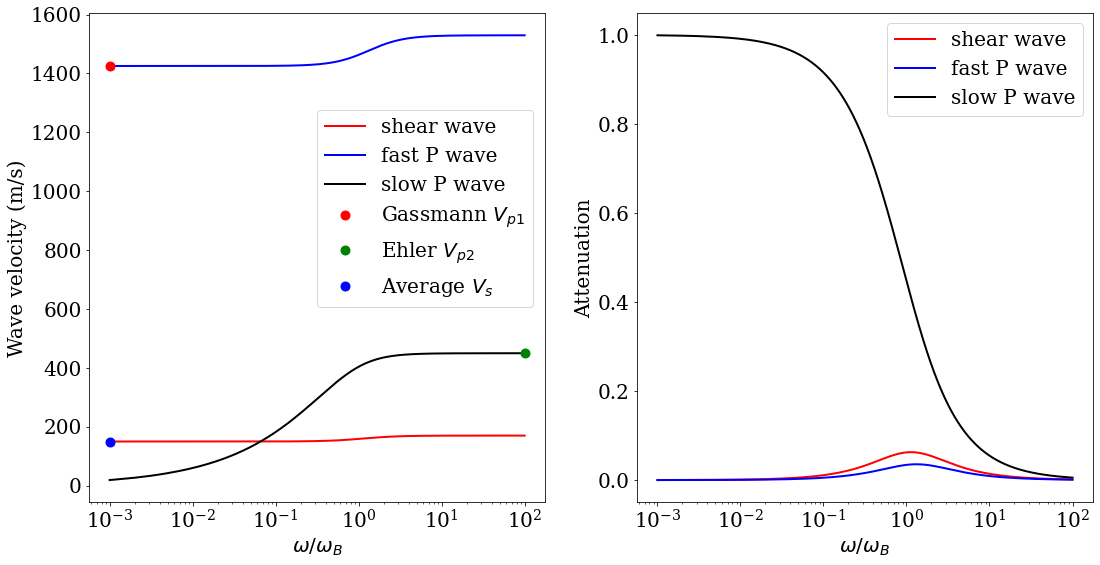

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 9), sharex=False, sharey=False)

ax[0].plot(t, data_s, 'r-', linewidth = 2, label = 'shear wave')
ax[0].plot(t, data_p1, 'b-', linewidth = 2, label = 'fast P wave')
ax[0].plot(t, data_p2, 'k-', linewidth = 2, label = 'slow P wave')

ax[0].plot(0.001, 1425, 'ro', markersize = 9, label = 'Gassmann $V_{p1}$')
ax[0].plot(100, 450, 'go', markersize = 9, label = 'Ehler $V_{p2}$')

ax[0].plot(0.001, 150, 'bo', markersize = 9, label = 'Average $V_s$')


#plt.xlim(1, 100)
ax[0].set_xscale('log')
ax[0].set_xlabel('$\omega / \omega_B$')
ax[0].set_ylabel('Wave velocity (m/s)')

ax[0].legend(loc = (0.5, 0.4))

ax[1].plot(t, data_dam_s, 'r-', linewidth = 2, label = 'shear wave')
ax[1].plot(t, data_dam_p1, 'b-', linewidth = 2, label = 'fast P wave')
ax[1].plot(t, data_dam_p2, 'k-', linewidth = 2, label = 'slow P wave')
#plt.ylim(0., 1)
ax[1].set_xscale('log')
ax[1].set_xlabel('$\omega / \omega_B$')
ax[1].set_ylabel('Attenuation')

ax[1].legend(loc = 'best')

#plt.savefig('dispersion_attenuation.jpg', dpi=800)
plt.show()